In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
##그래프의 결과를 출력 세션에 나타나게 하자
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [2]:
data = pd.read_csv('3.세종시_아파트(매매)_실거래가.csv')

### 아파트 계약년월일 기준 오름차순

In [ ]:
#읍면동 구분하는 함수
def sort_dong(df):
    a=df.split(" ")
    if a[1][-1]=='동':
        return '동'
    elif a[1][-1]=='면':
        return '면'
    else :
        return '읍'
data['읍면동구분']=data['시군구'].apply(sort_dong)

In [3]:
#동 구분하는 함수
def sort_dong2(df):
    a=df.split(" ")
    return a[1]
#data['읍면동']=data['시군구'].apply(sort_dong2)

In [ ]:
data['읍면동'].unique()

In [ ]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['평']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'평별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [ ]:
def year(df):
    return df[:-2]
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)

In [ ]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'년도별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [ ]:
def riri(df):
    return int(float(df.replace(',','')))
data['거래금액(만원)'] =data['거래금액(만원)'].apply(riri)

In [4]:
def pyeong(df):
    if df< 33:
        return '10평 미만'
    elif df>= 33 and df < 66:
        return '10~20평'
    elif df>= 66 and df < 99:
        return '20~30평'
    elif df>= 99 and df < 132:
        return '30~40평'
    elif df>= 132 and df < 165:
        return '40~50평'
    elif df>= 165 and df < 198:
        return '50~60평'
    else:
        return '60평 이상'

In [5]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)

In [6]:
yata = pd.read_csv('4.세종시_연립다세대(매매)_실거래가.csv')
yata["평"]=yata["전용면적(㎡)"].apply(pyeong)

In [7]:
danta = pd.read_csv('5.세종시_단독다가구(매매)_실거래가.csv')
danta["평"]=danta["연면적(㎡)"].apply(pyeong)

In [8]:
oata = pd.read_csv('6.세종시_오피스텔(매매)_실거래가.csv')
oata["평"]=oata["전용면적(㎡)"].apply(pyeong)

In [9]:
def year(df):
    return df[:-2]
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)

In [10]:
data_jeon = pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv')
data_jeon["평"]=data_jeon["전용면적(㎡)"].apply(pyeong)

In [11]:
yata_jeon = pd.read_csv('8.세종시_연립다세대(전월세)_실거래가.csv')
yata_jeon["평"]=yata_jeon["전용면적(㎡)"].apply(pyeong)

In [12]:
danta_jeon = pd.read_csv('9.세종시_단독다가구(전월세)_실거래가.csv')
danta_jeon["평"]=danta_jeon["계약면적(㎡)"].apply(pyeong)

In [13]:
oata_jeon = pd.read_csv('10.세종시_오피스텔(전월세)_실거래가.csv')
oata_jeon["평"]=oata_jeon["전용면적(㎡)"].apply(pyeong)

In [14]:
data_all = pd.concat([data,yata,danta,oata,data_jeon,yata_jeon,danta_jeon,oata_jeon], ignore_index=True)

In [15]:
data_all["읍면동"]=data_all['시군구'].apply(sort_dong2)
data_all

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,...,대지권면적(㎡),주택유형,도로조건,연면적(㎡),대지면적(㎡),전월세구분,보증금(만원),월세(만원),계약면적(㎡),읍면동
0,201701,19,세종특별자치시 고운동,1401,0.0,가락마을13단지(대광로제비앙),59.6550,"23,000",11.0,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고운동
1,201701,2,세종특별자치시 고운동,1393,0.0,가락마을15단지(중흥파크뷰),84.9894,"32,000",3.0,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고운동
2,201701,14,세종특별자치시 고운동,1395,0.0,가락마을16단지(에듀그린),84.8788,"32,500",21.0,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고운동
3,201701,9,세종특별자치시 고운동,1386,0.0,가락마을17단지(골드클래스),59.9159,"25,100",7.0,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고운동
4,201701,9,세종특별자치시 고운동,1390,0.0,가락마을21단지(에듀포레),99.9434,"32,250",3.0,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,고운동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65509,202012,9,세종특별자치시 나성동,756,0.0,리치먼드시티세종,26.1800,NaN,6.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,전세,"14,000",0.0,NaN,나성동
65510,202012,16,세종특별자치시 나성동,756,0.0,리치먼드시티세종,32.5000,NaN,4.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,월세,"1,000",65.0,NaN,나성동
65511,202012,18,세종특별자치시 도담동,246,5.0,세종한신휴시티,24.0300,NaN,4.0,2014.0,...,NaN,NaN,NaN,NaN,NaN,전세,"9,000",0.0,NaN,도담동
65512,202012,28,세종특별자치시 나성동,756,0.0,리치먼드시티세종,26.1800,NaN,8.0,2020.0,...,NaN,NaN,NaN,NaN,NaN,전세,"16,000",0.0,NaN,나성동


<ipython-input-17-4a5f3cbffe2a>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


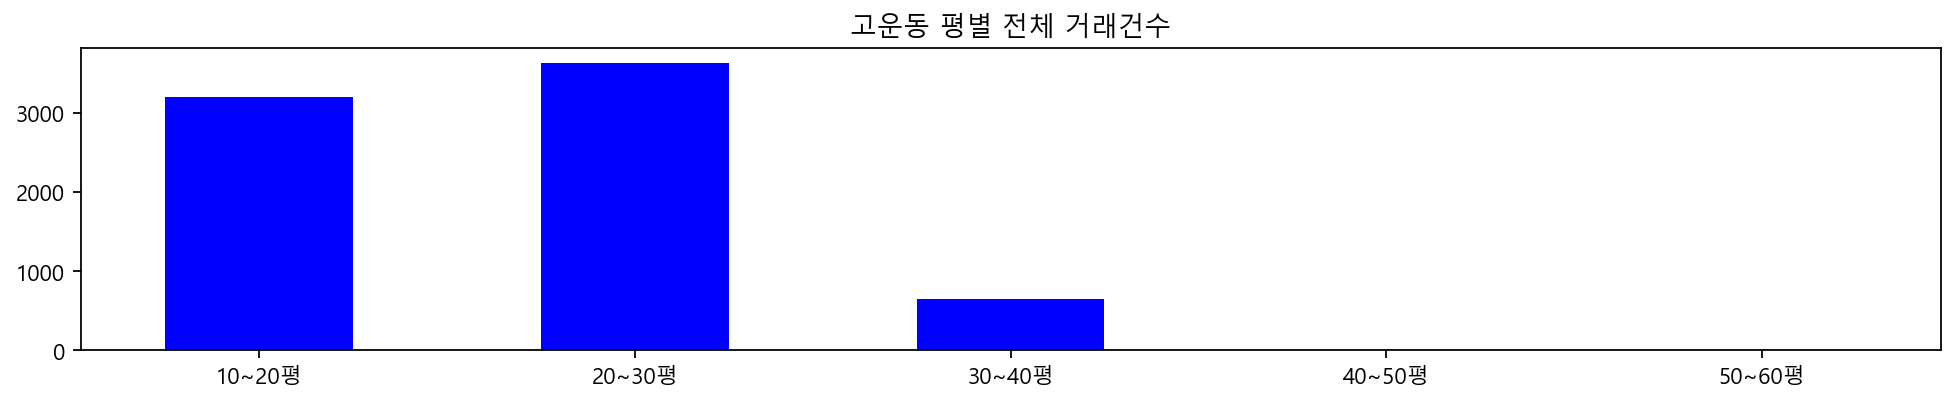

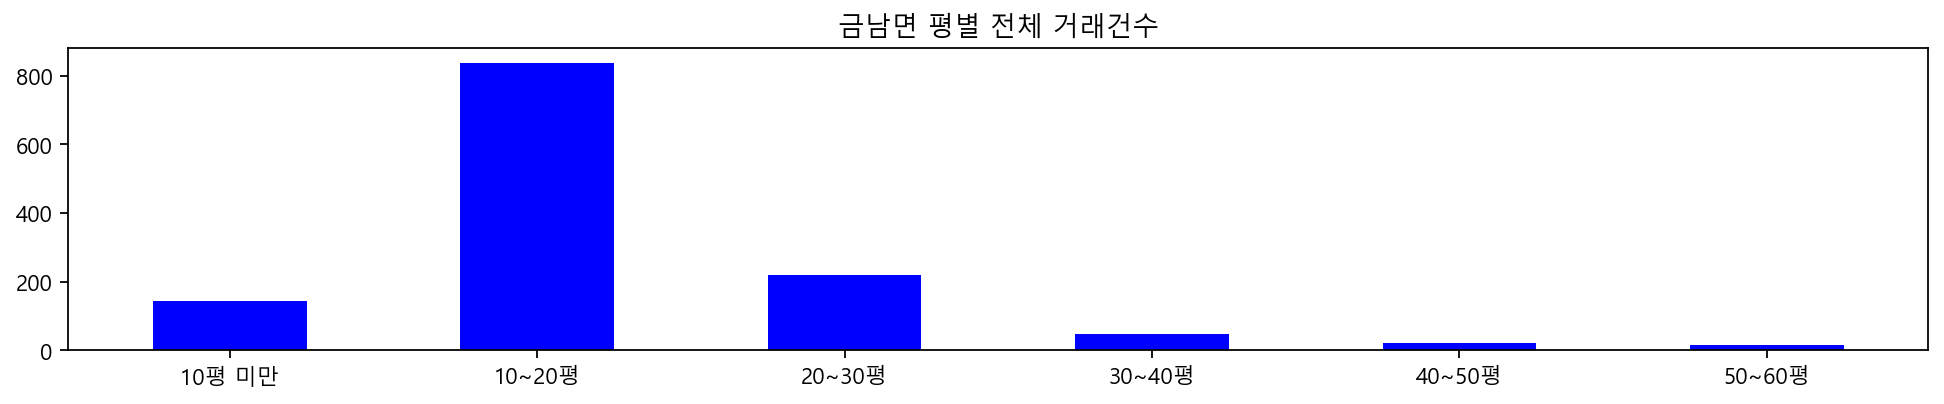

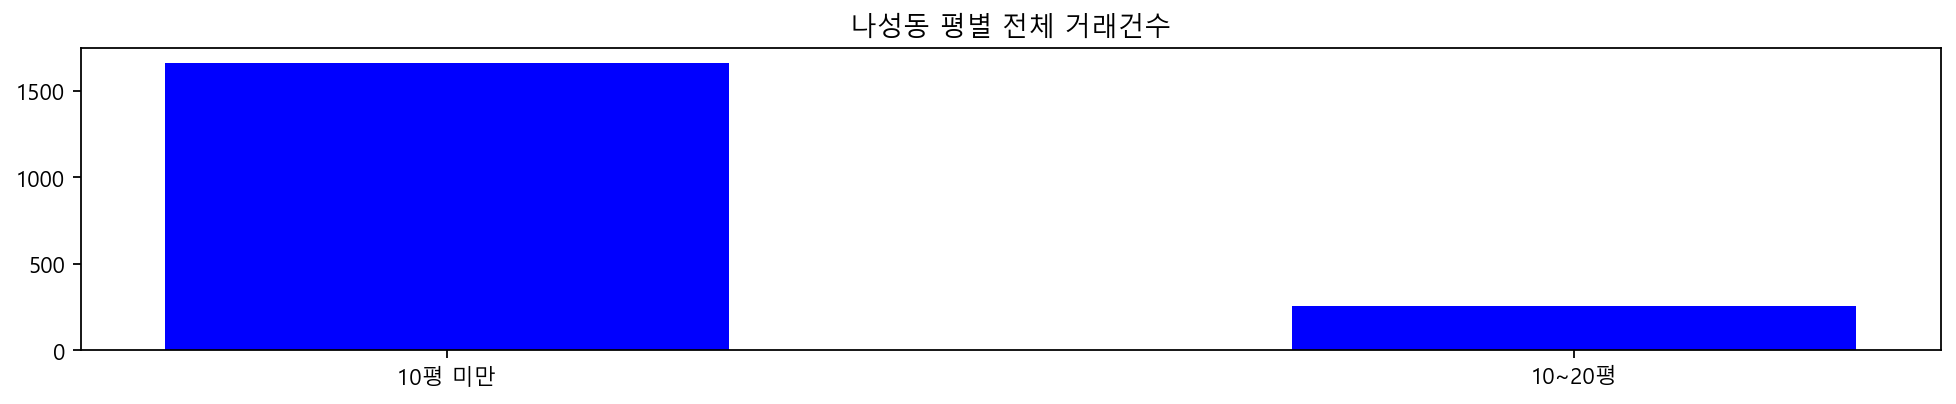

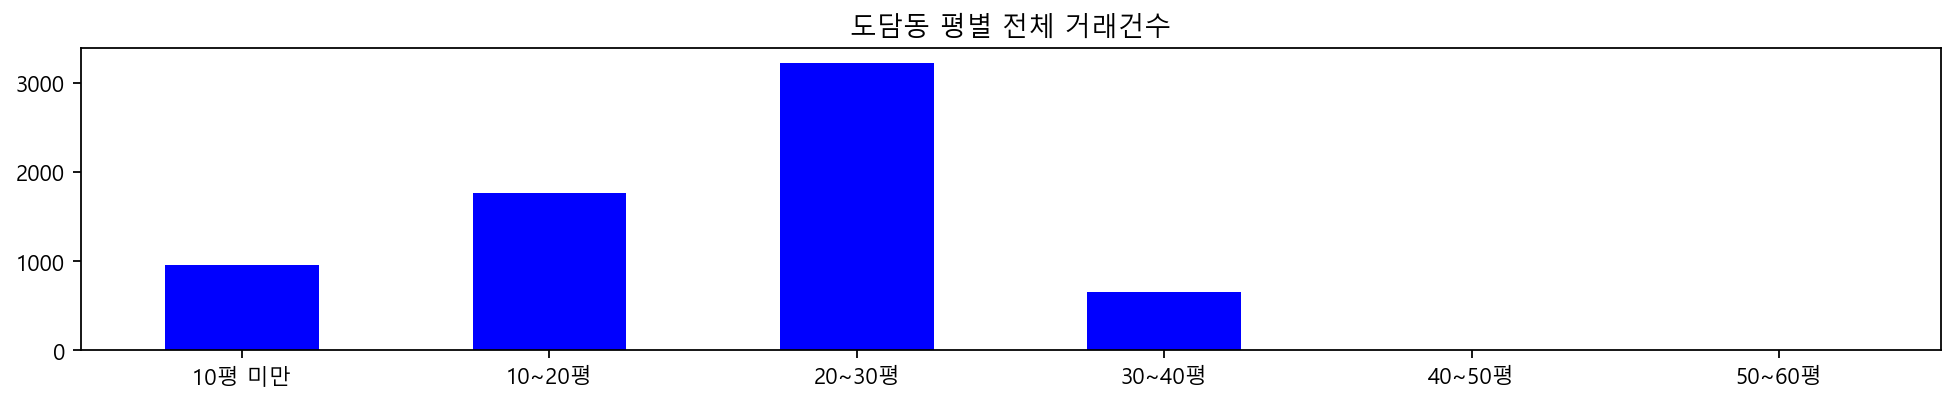

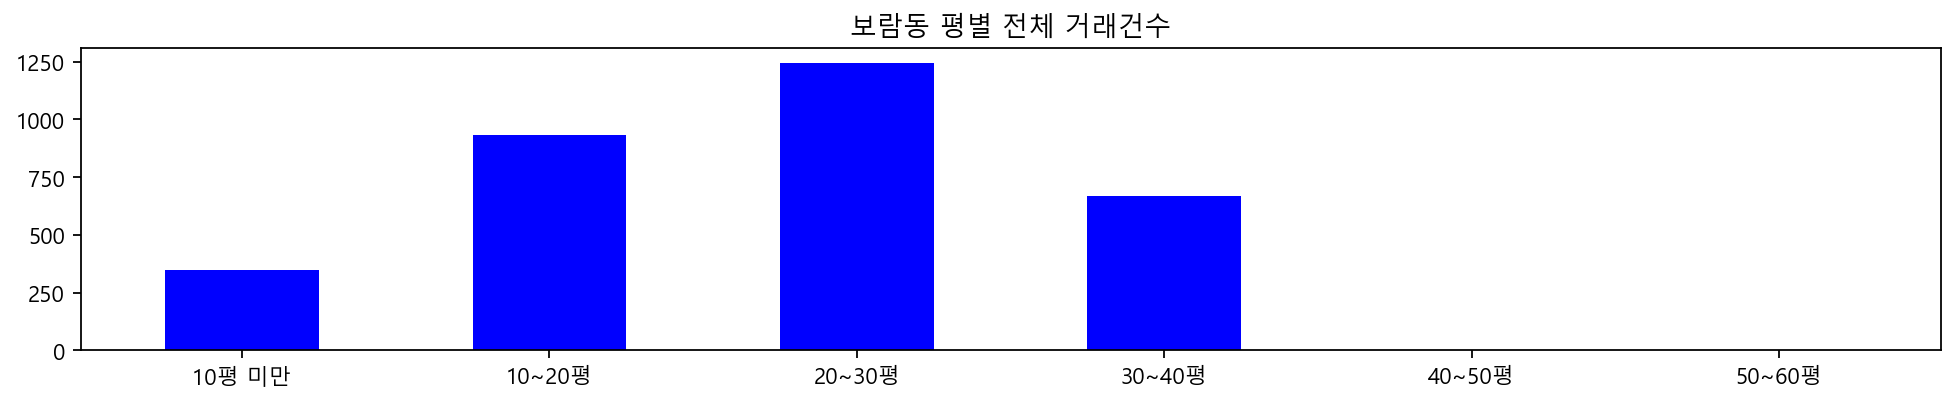

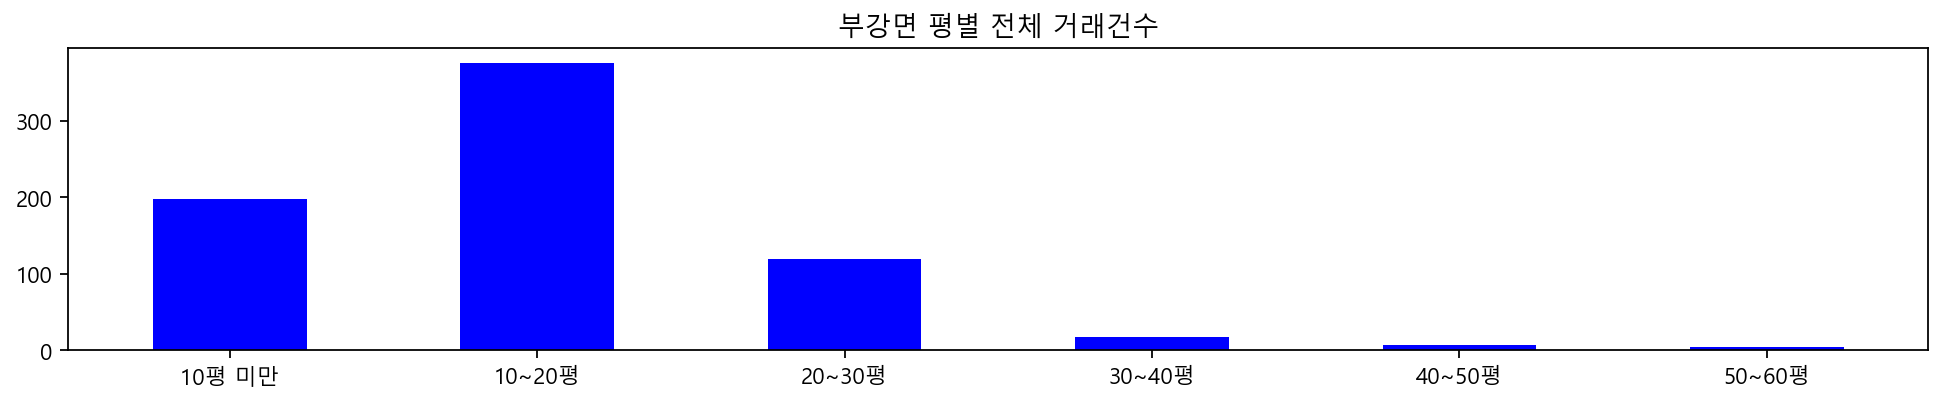

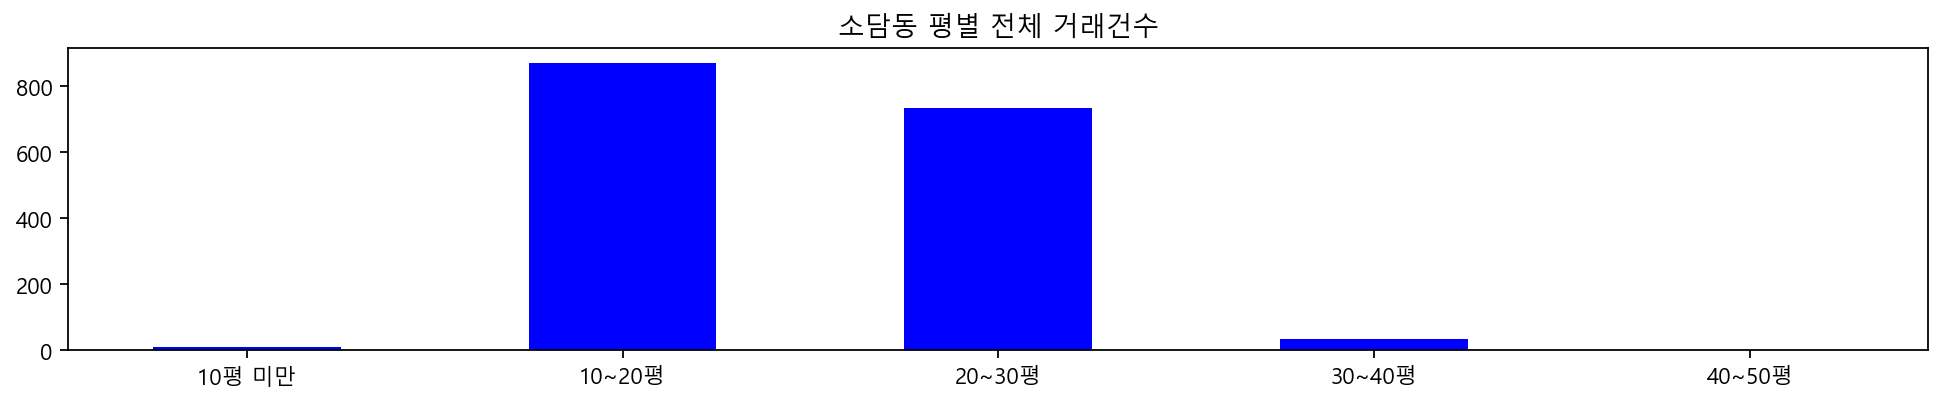

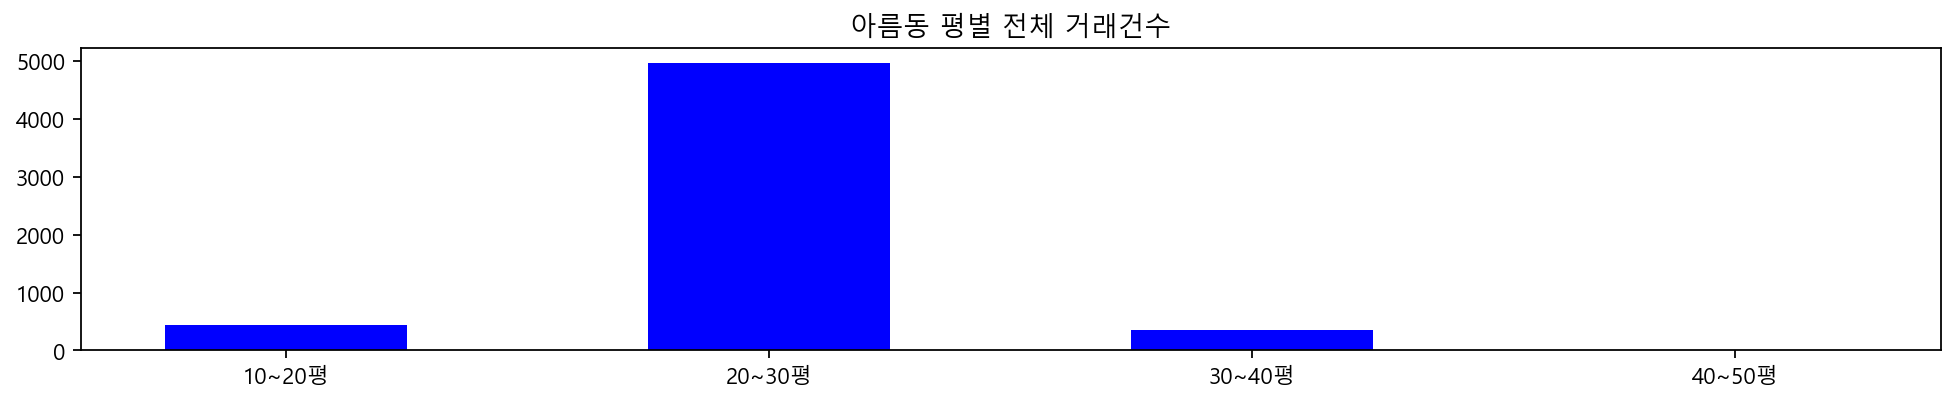

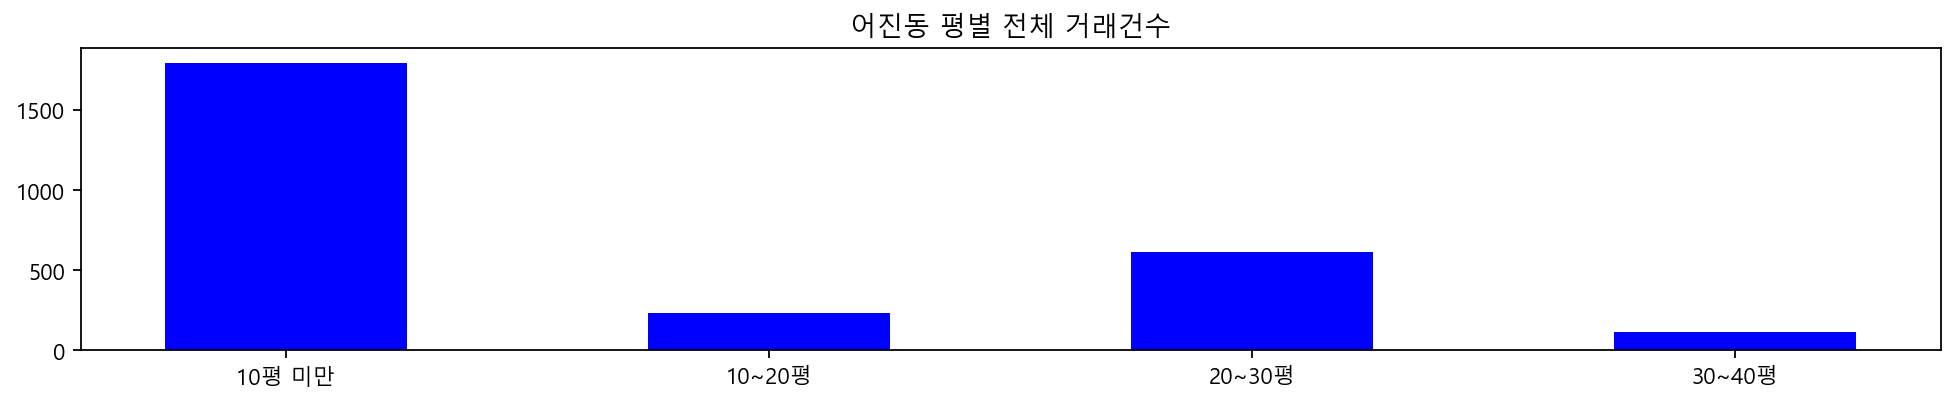

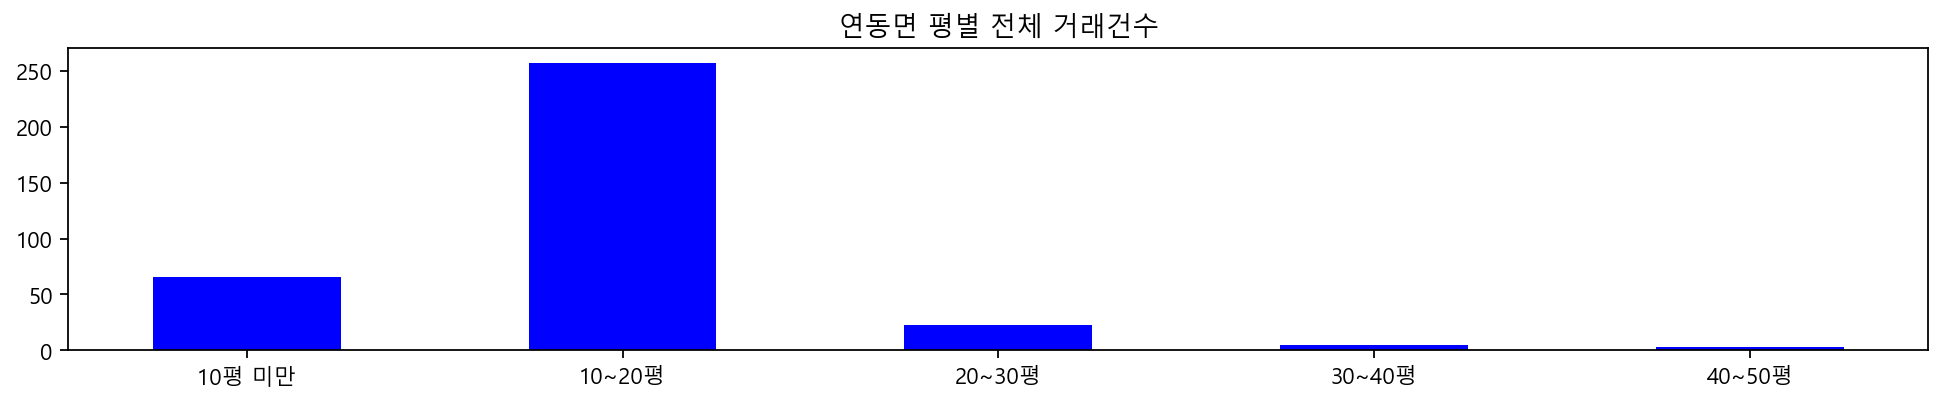

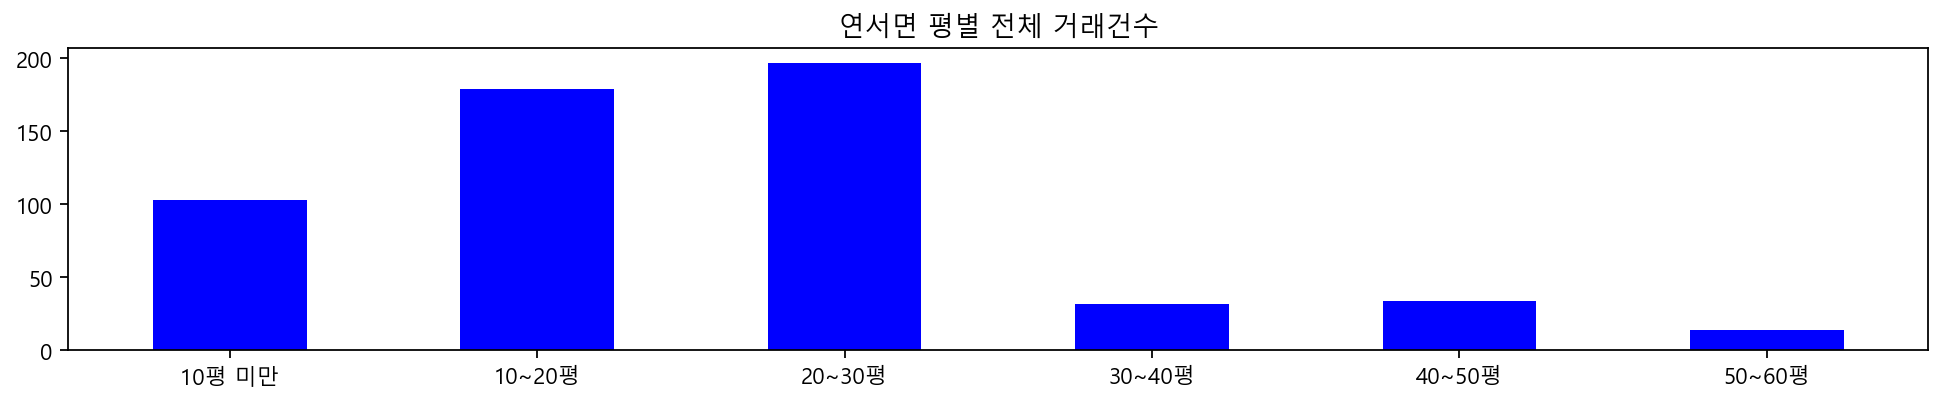

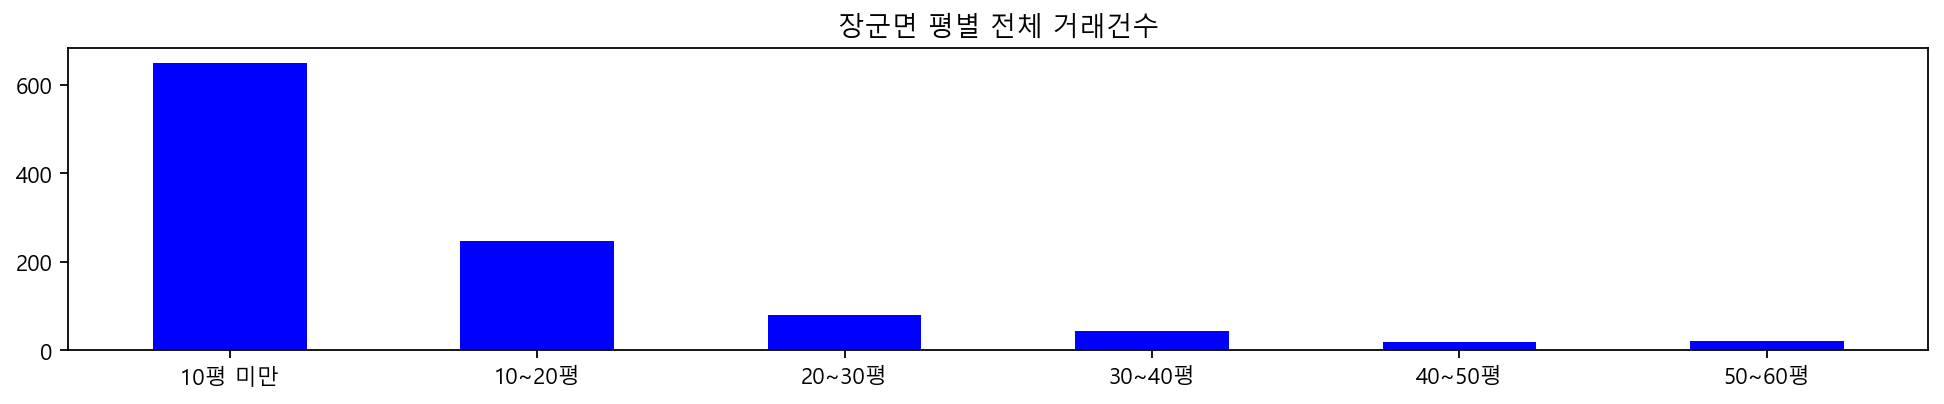

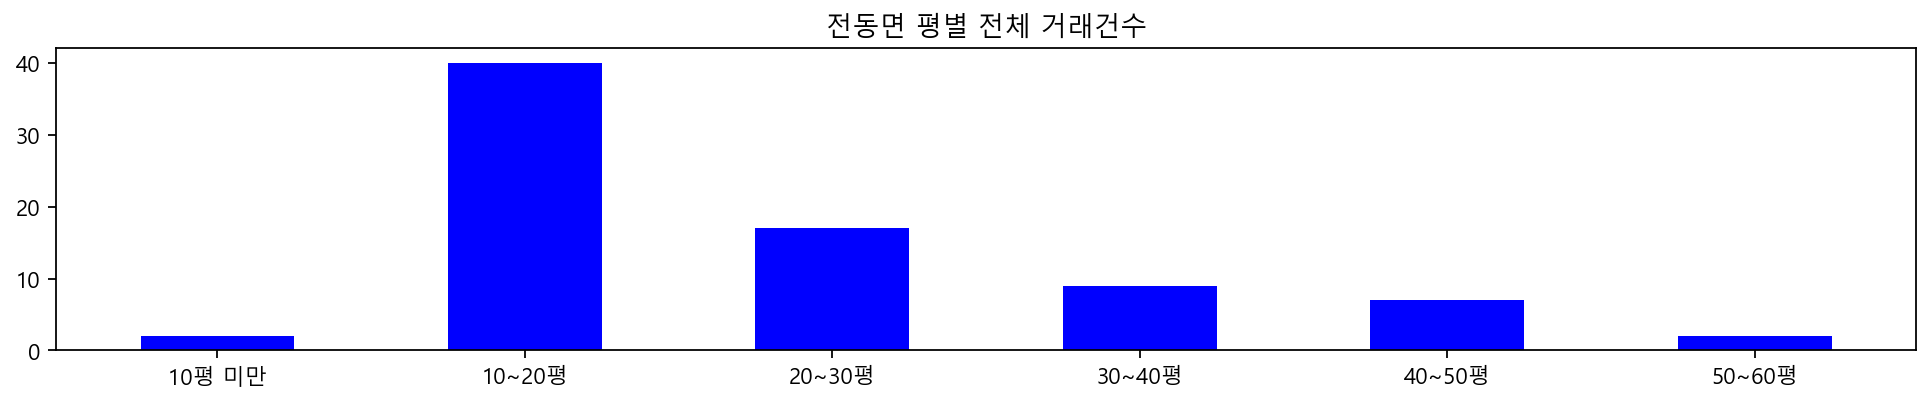

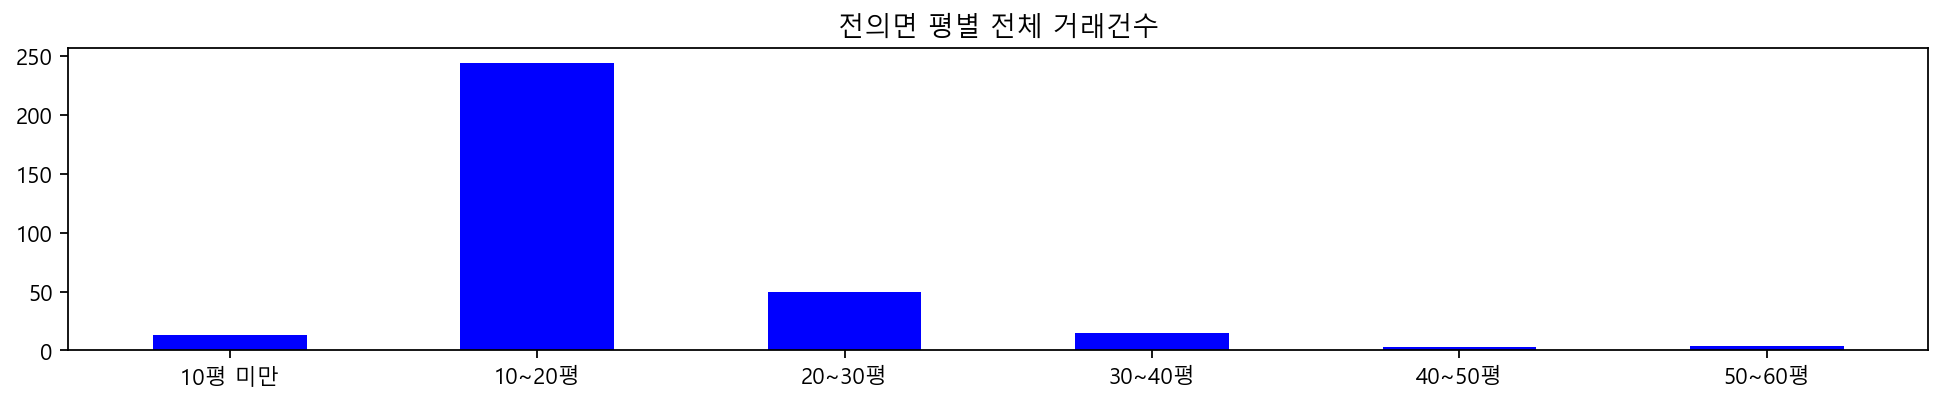

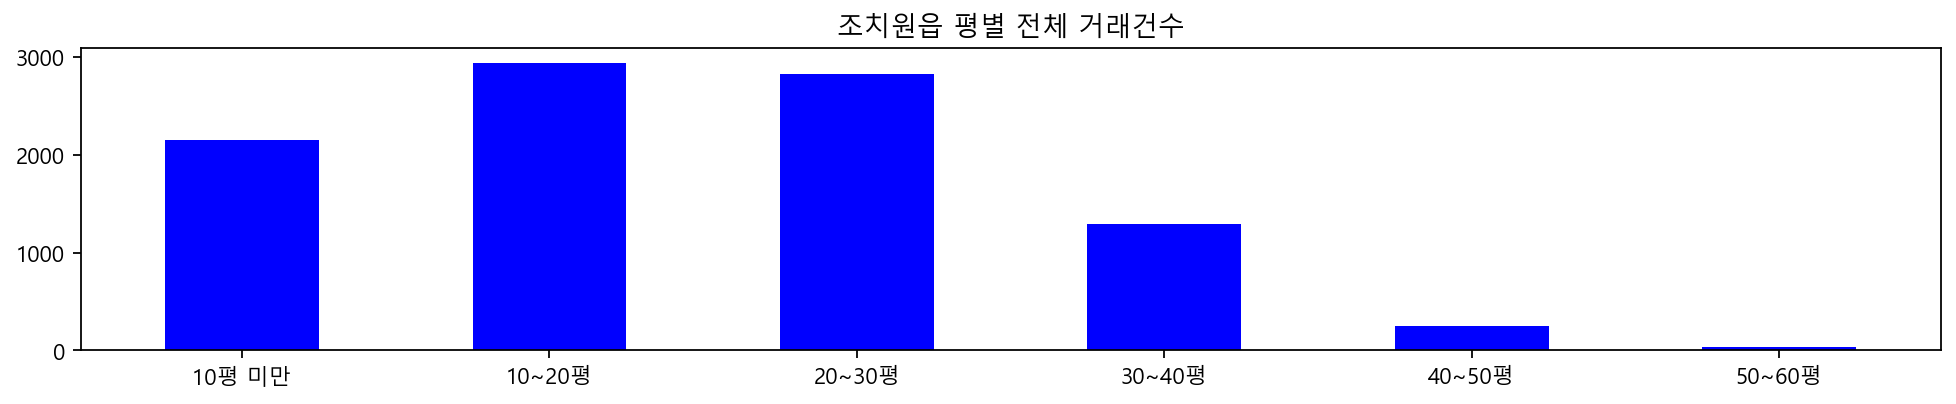

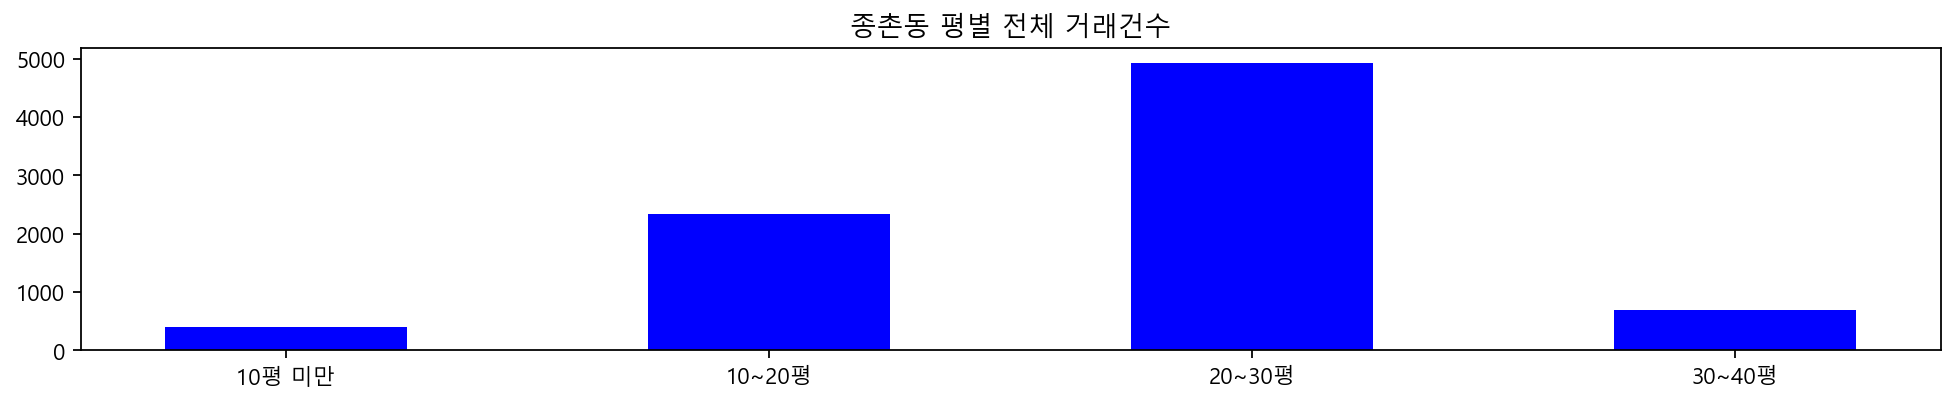

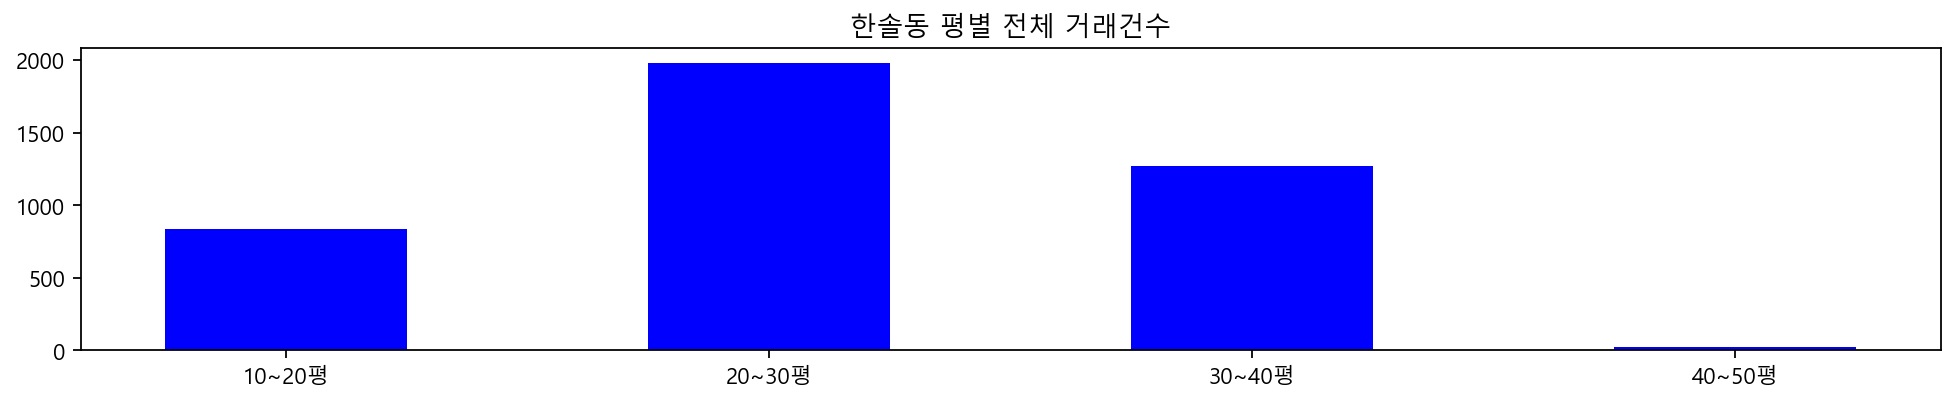

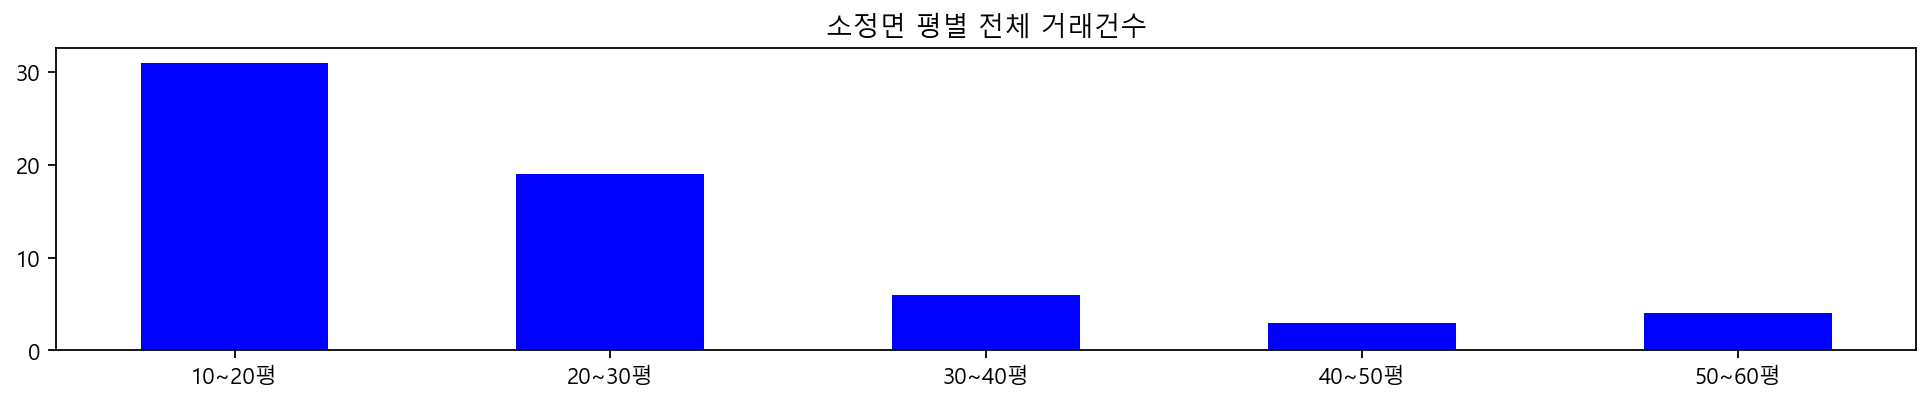

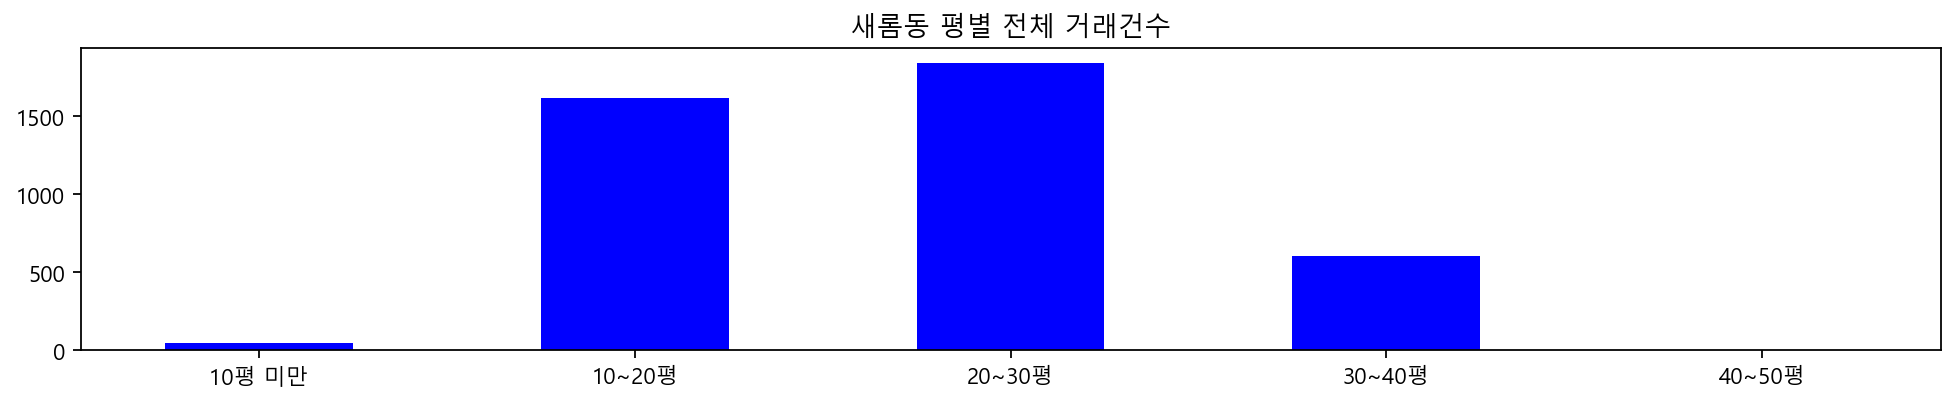

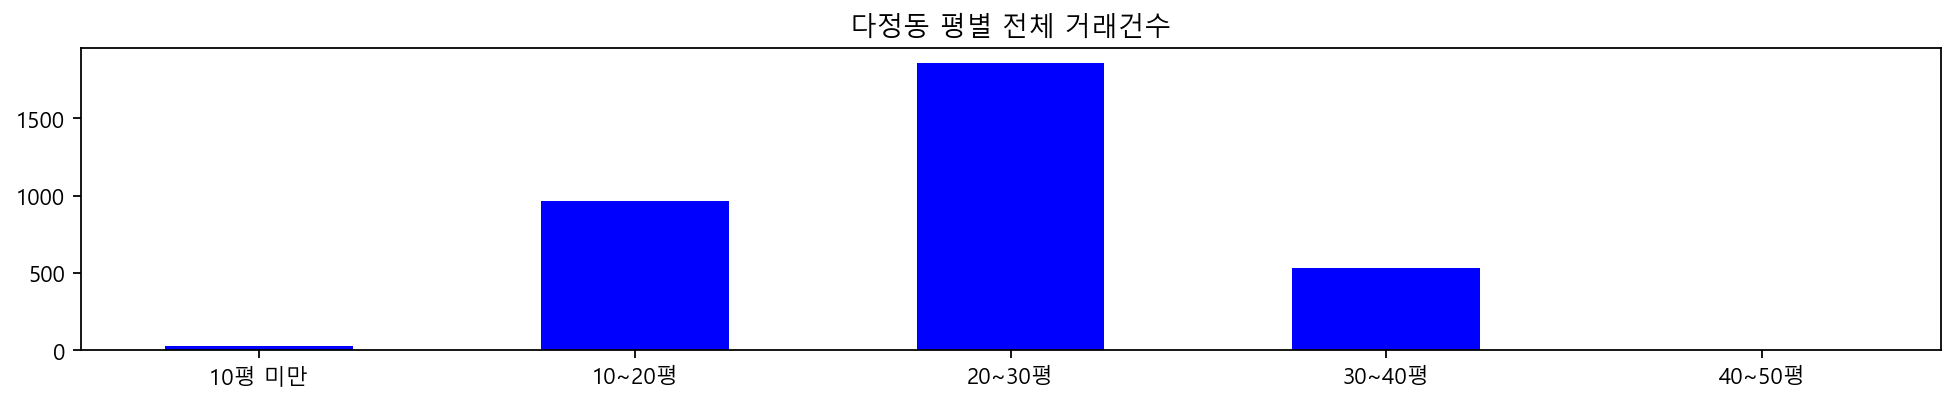

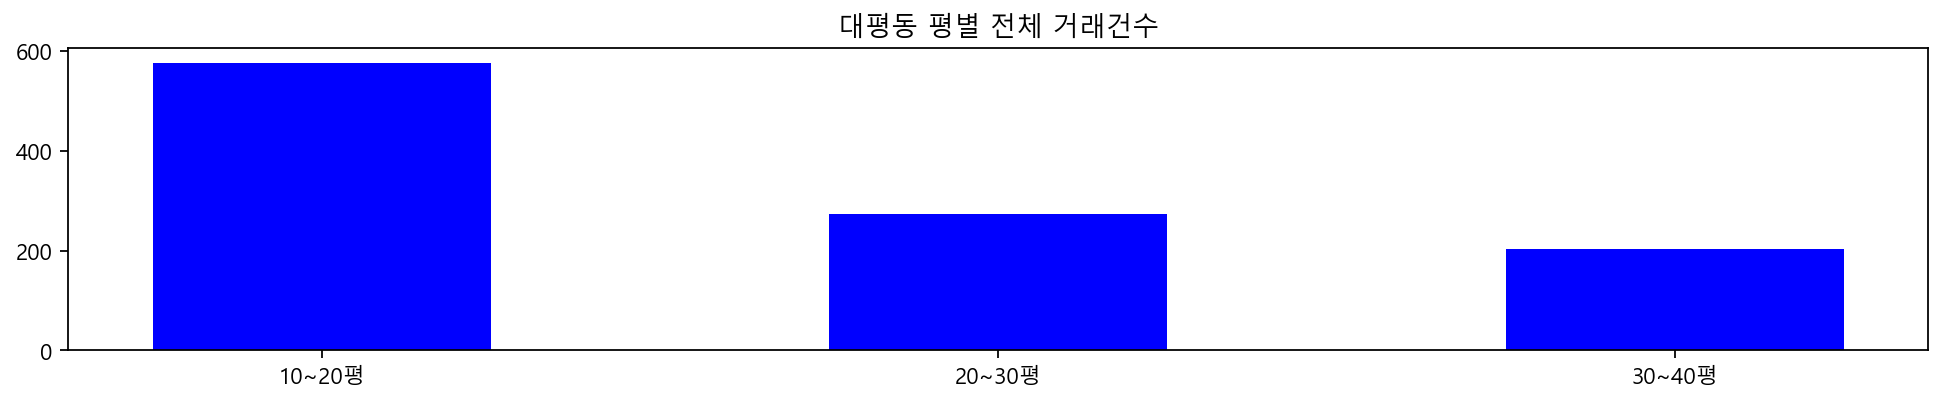

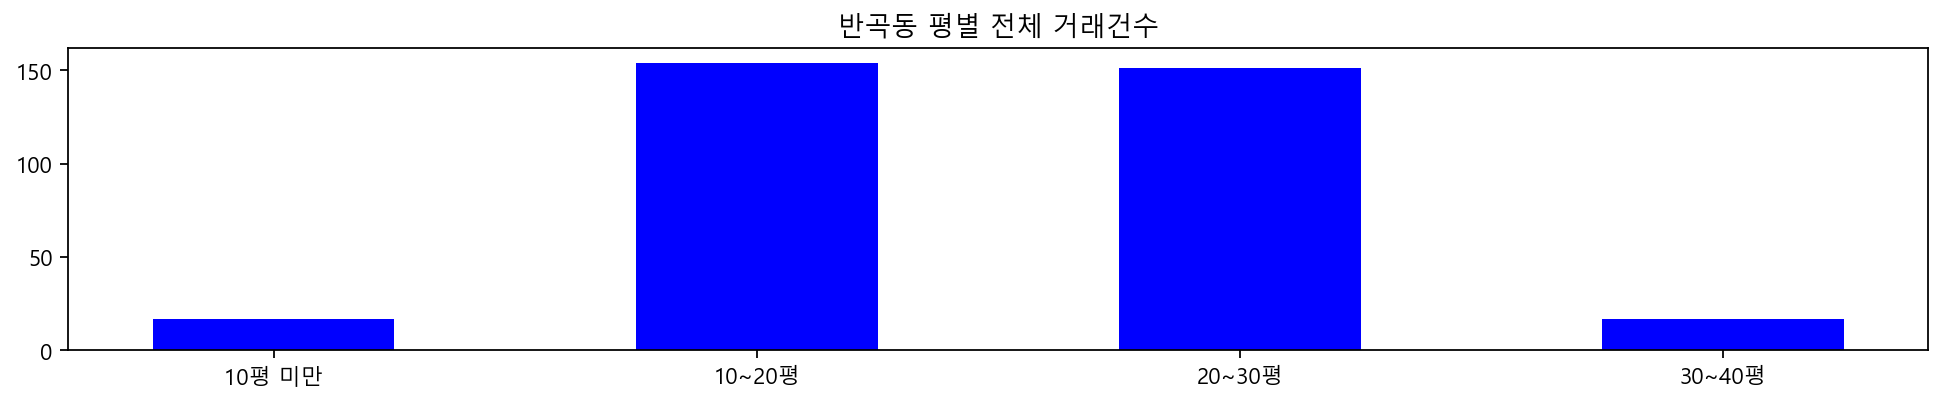

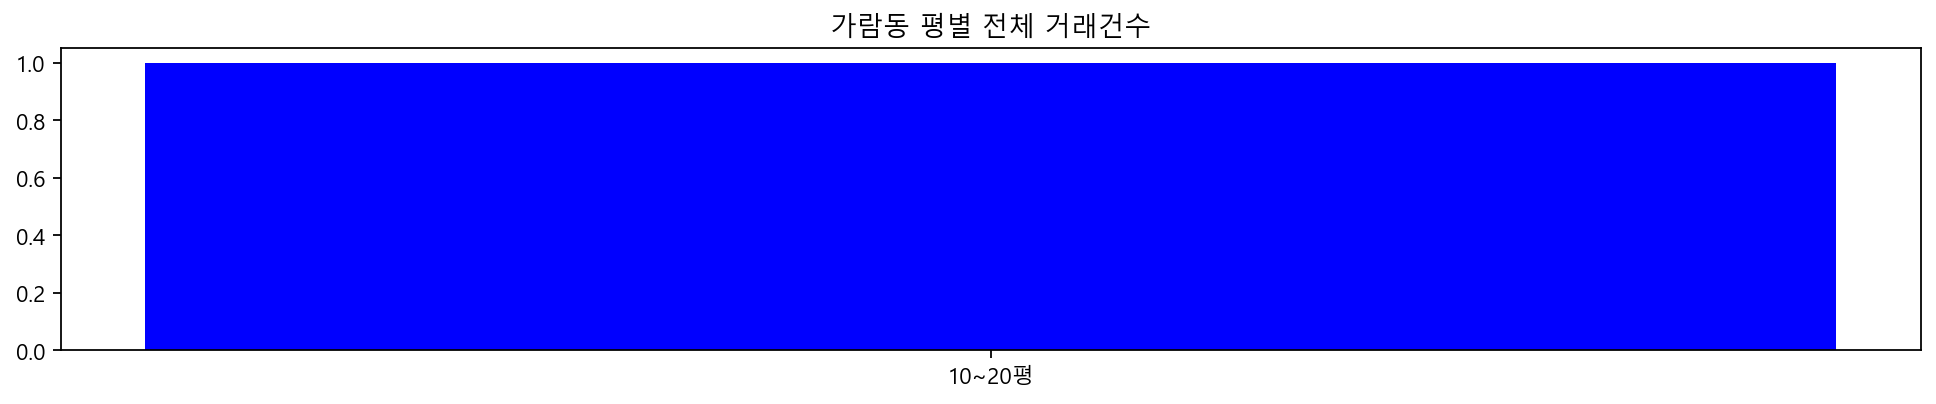

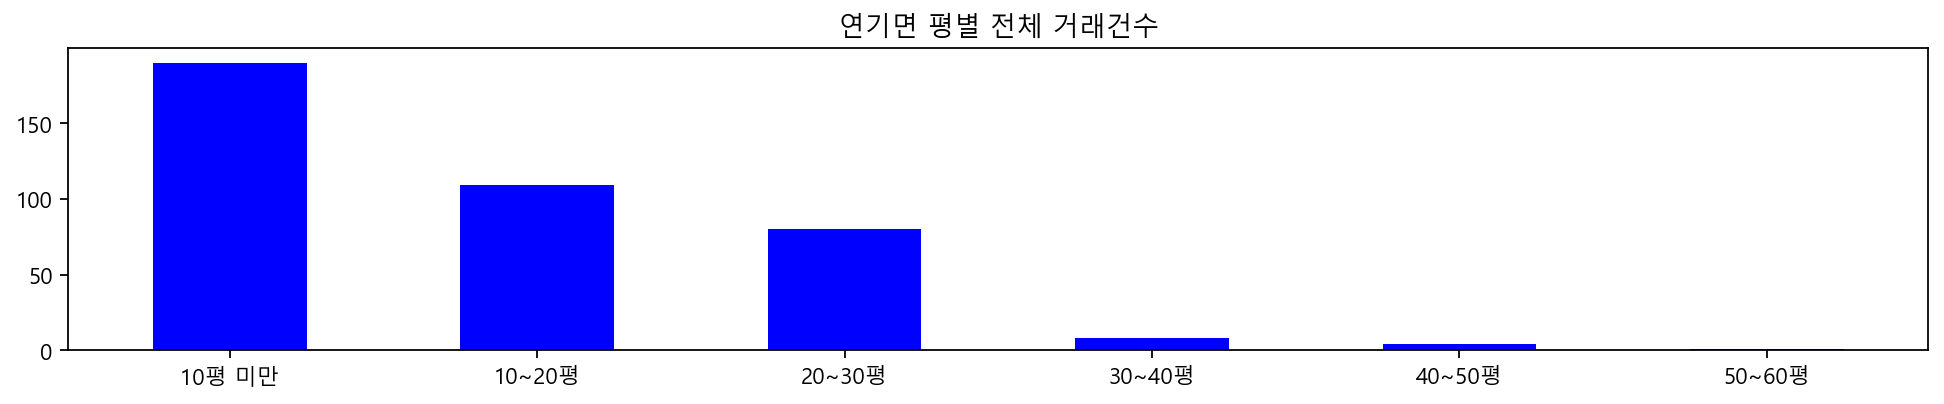

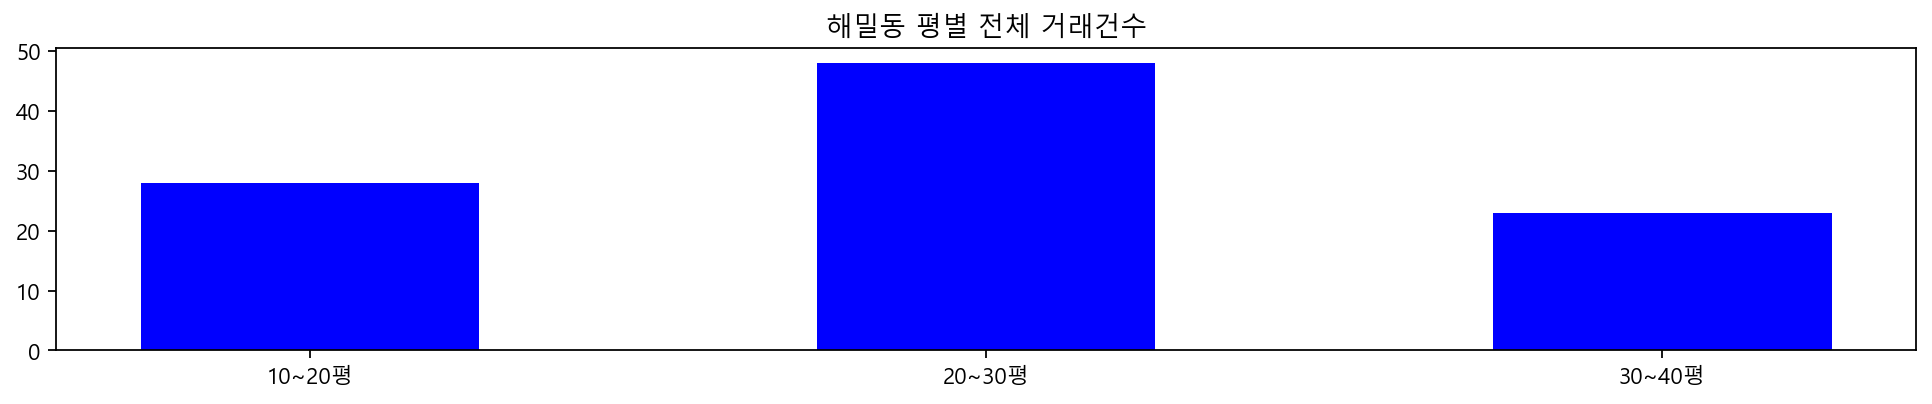

In [17]:
dong_all=data_all['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data_all[data_all['읍면동']==dong_one]
    group_new=new.groupby(['평']).count()
    group_new=group_new.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+' 평별 전체 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

<ipython-input-19-4c553a5c99d1>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


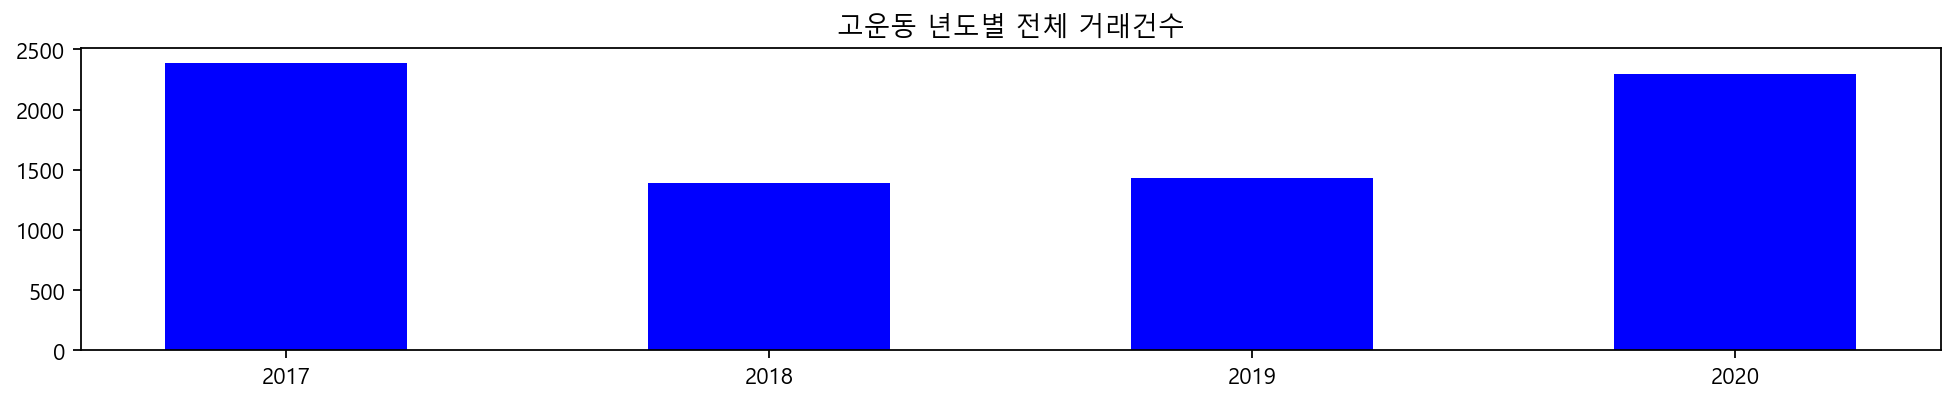

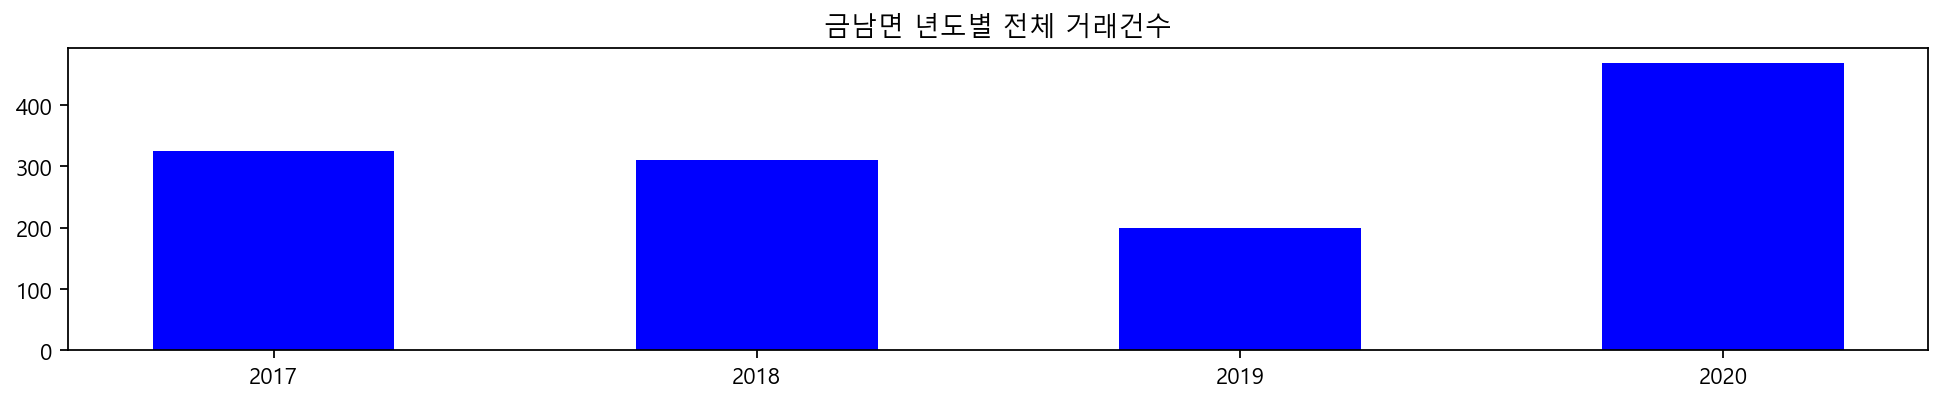

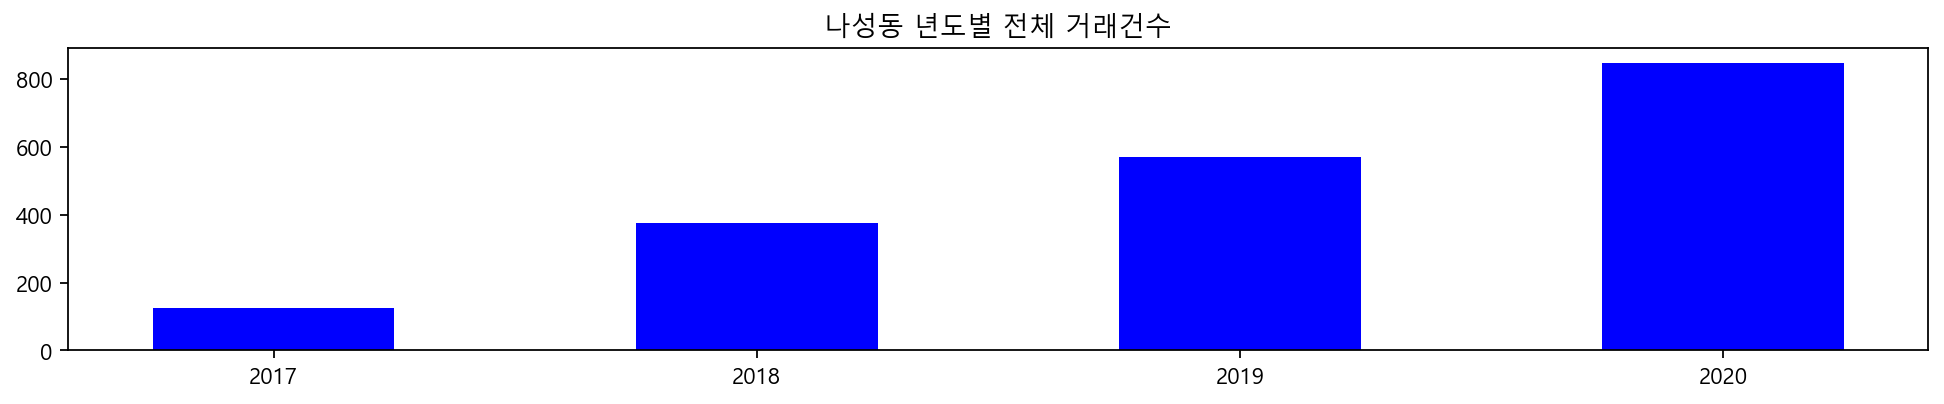

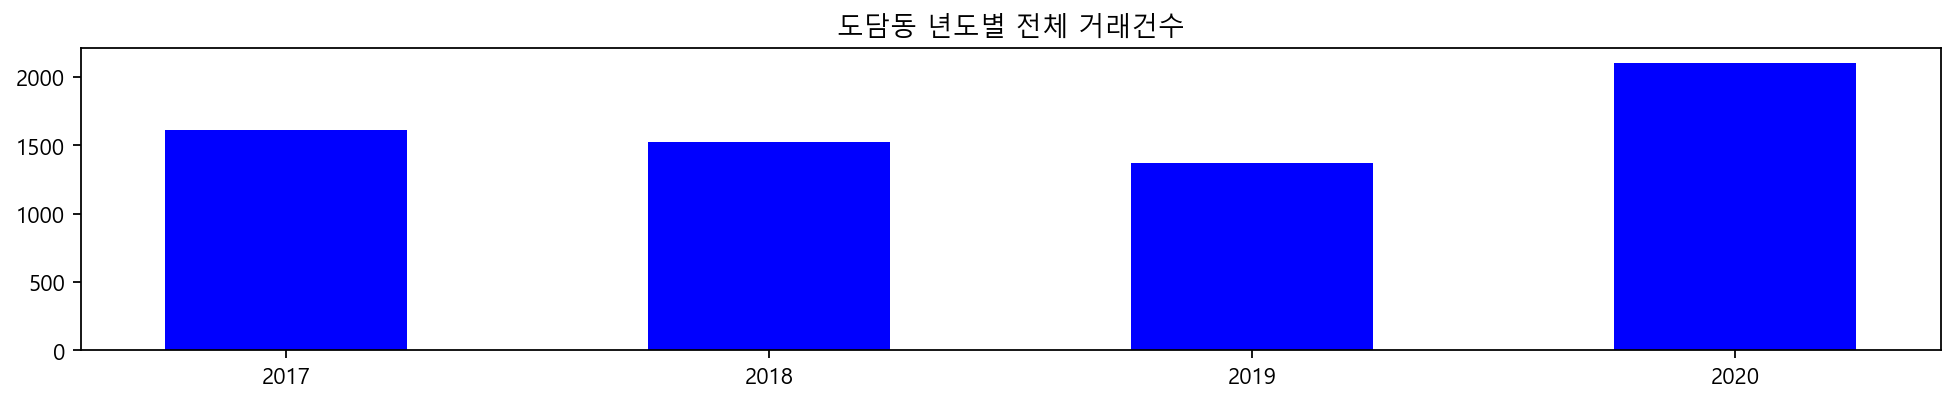

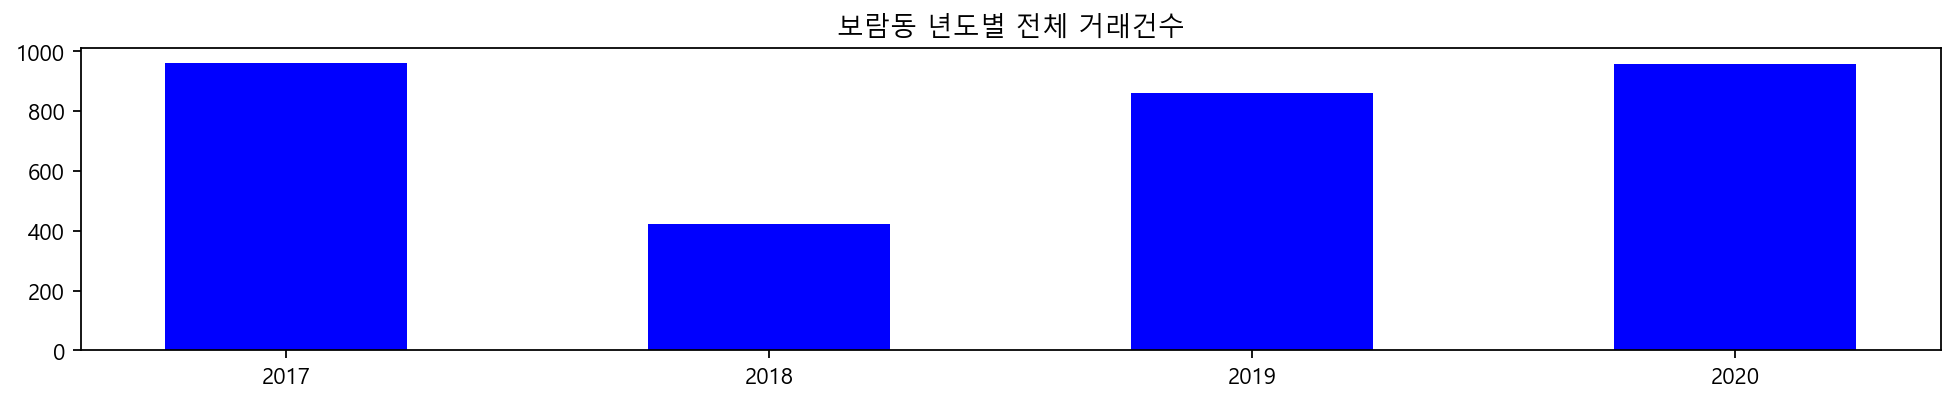

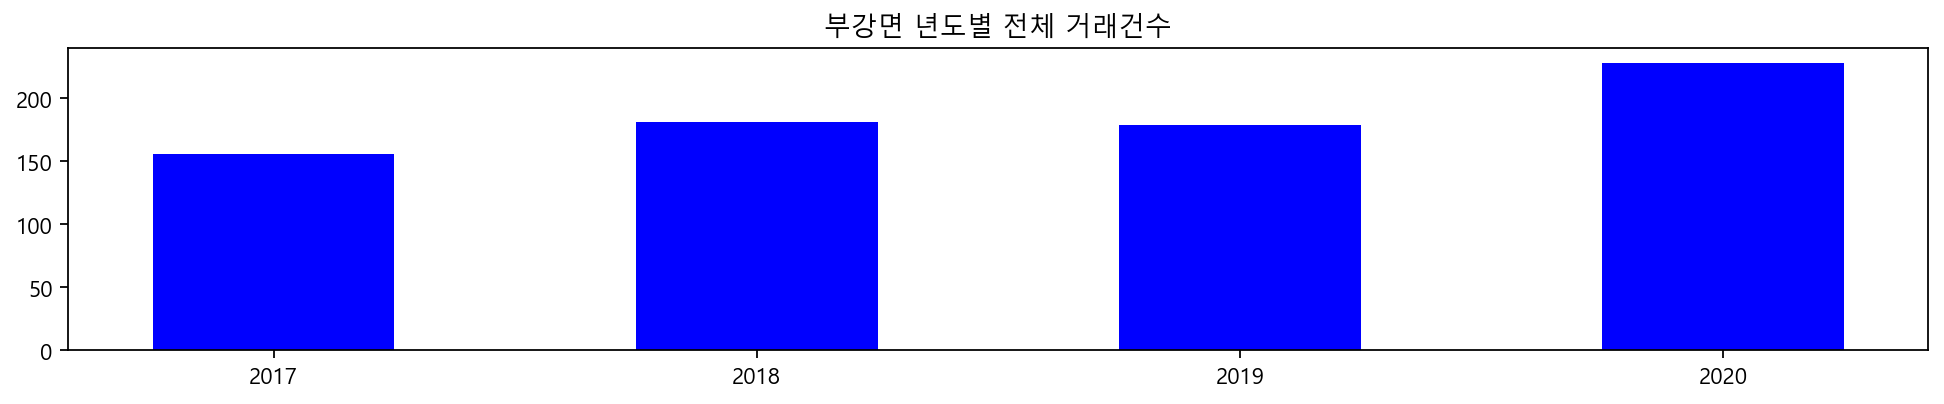

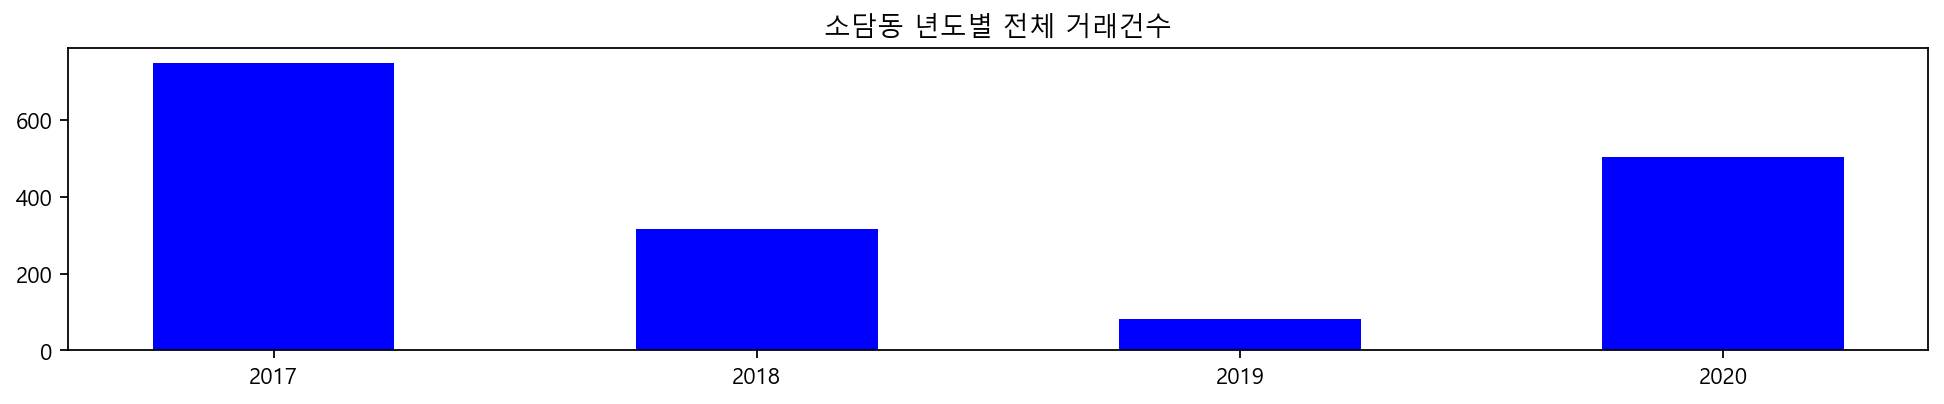

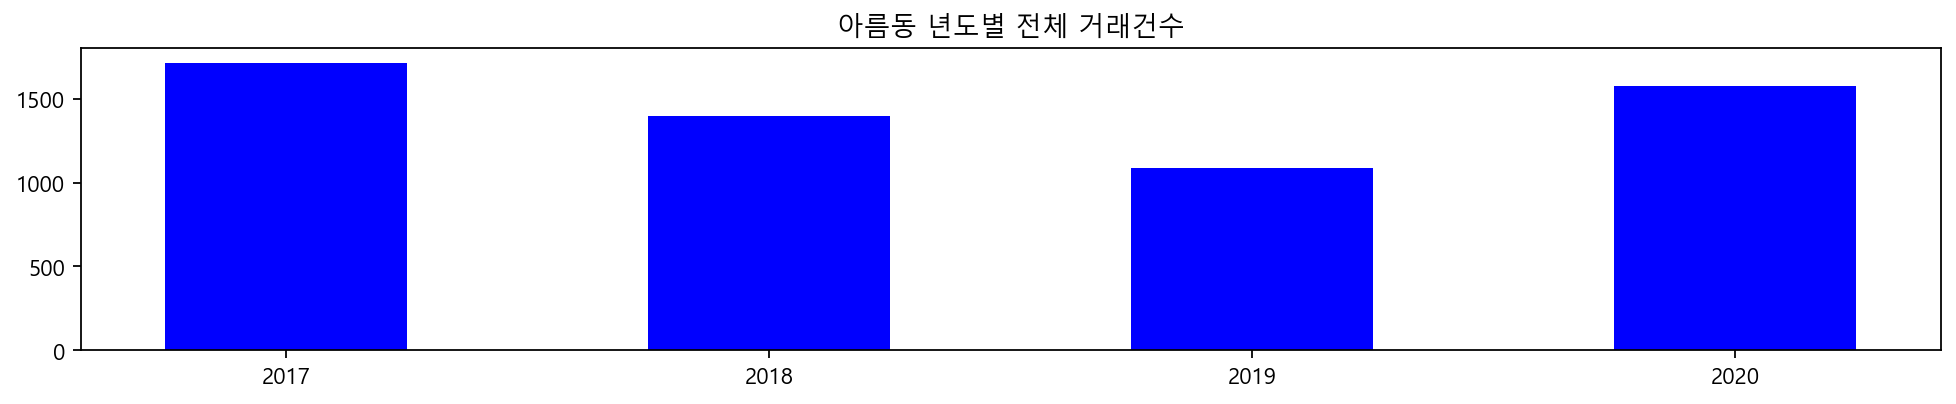

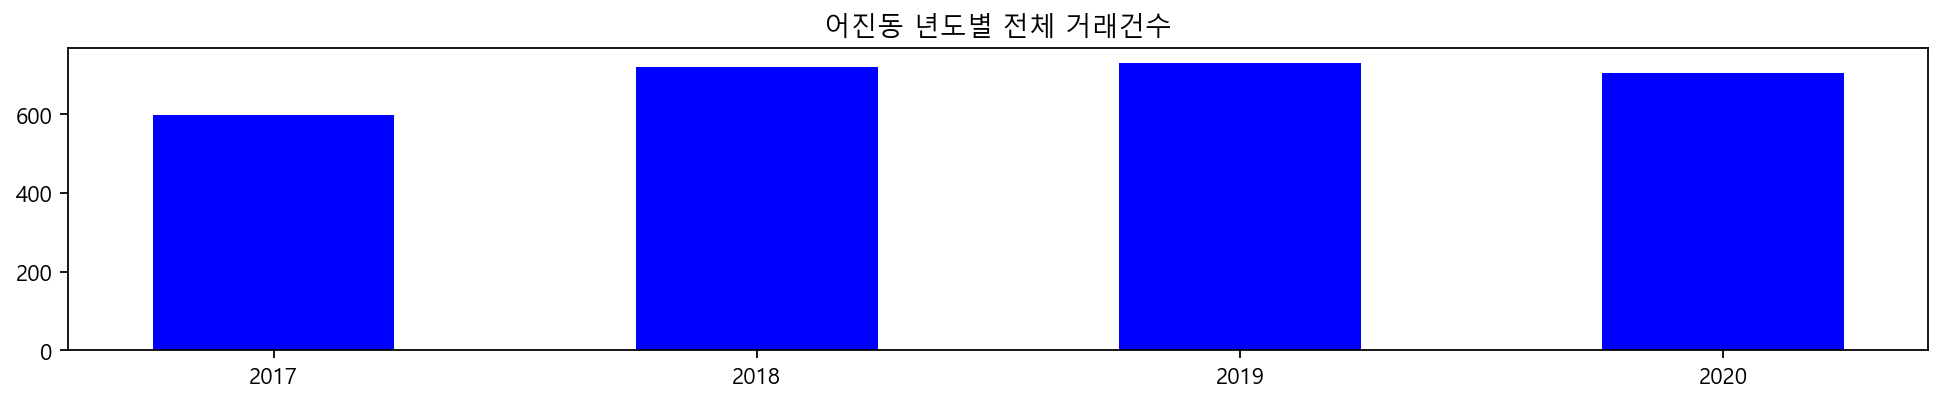

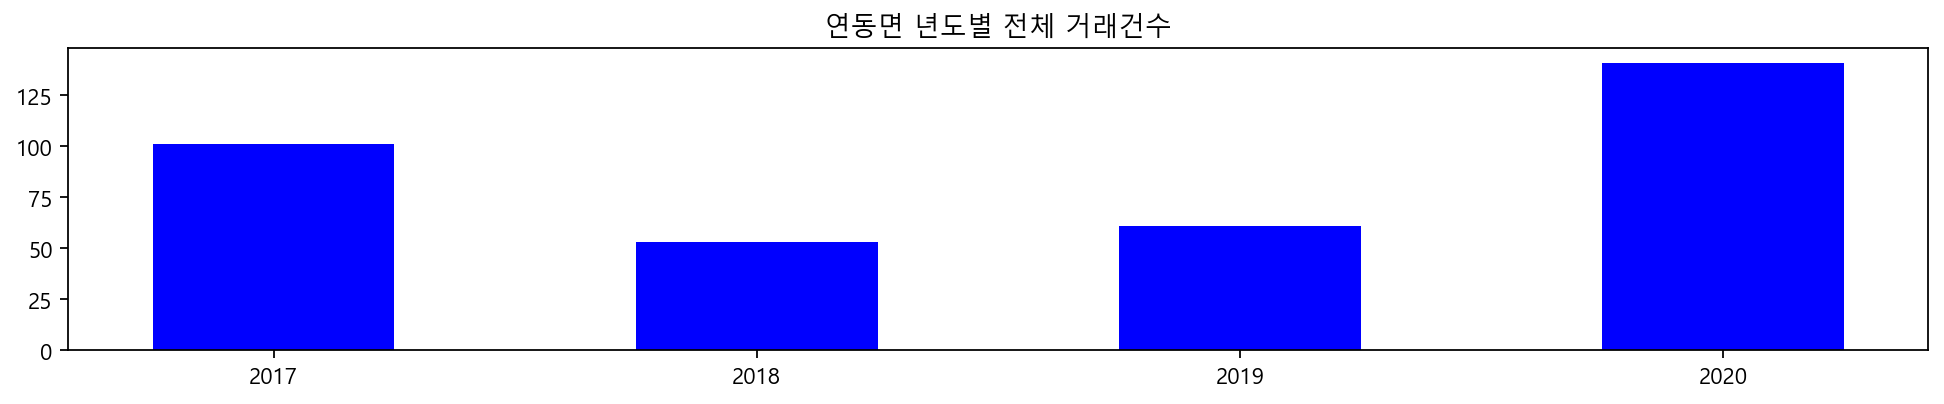

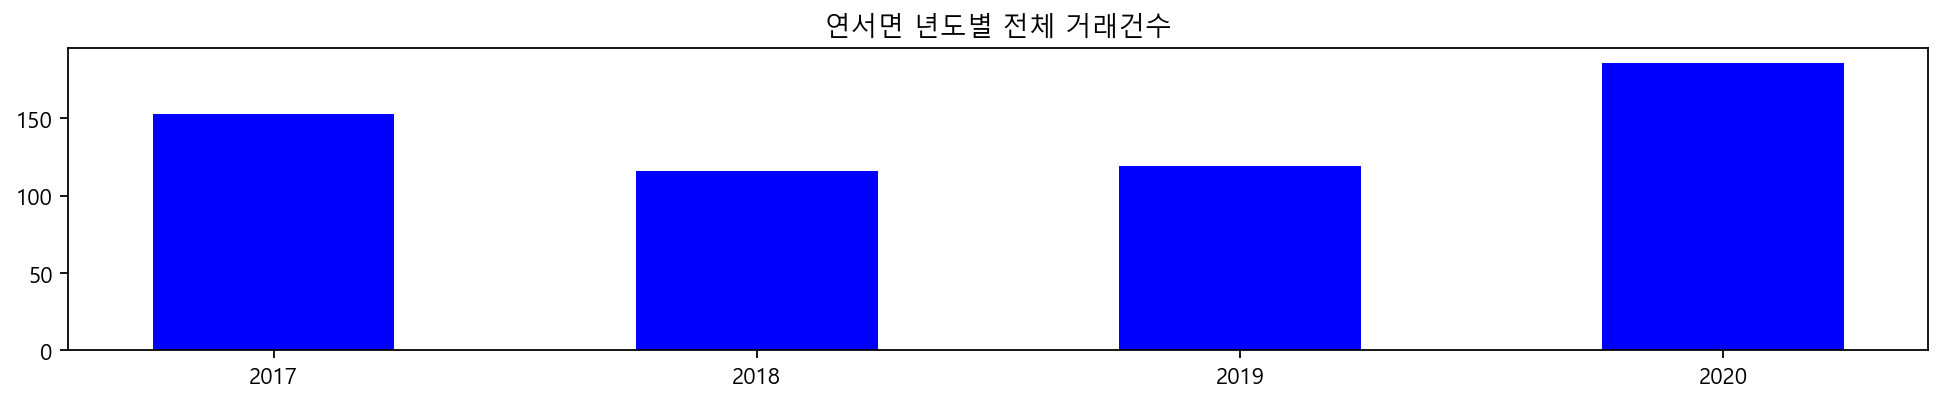

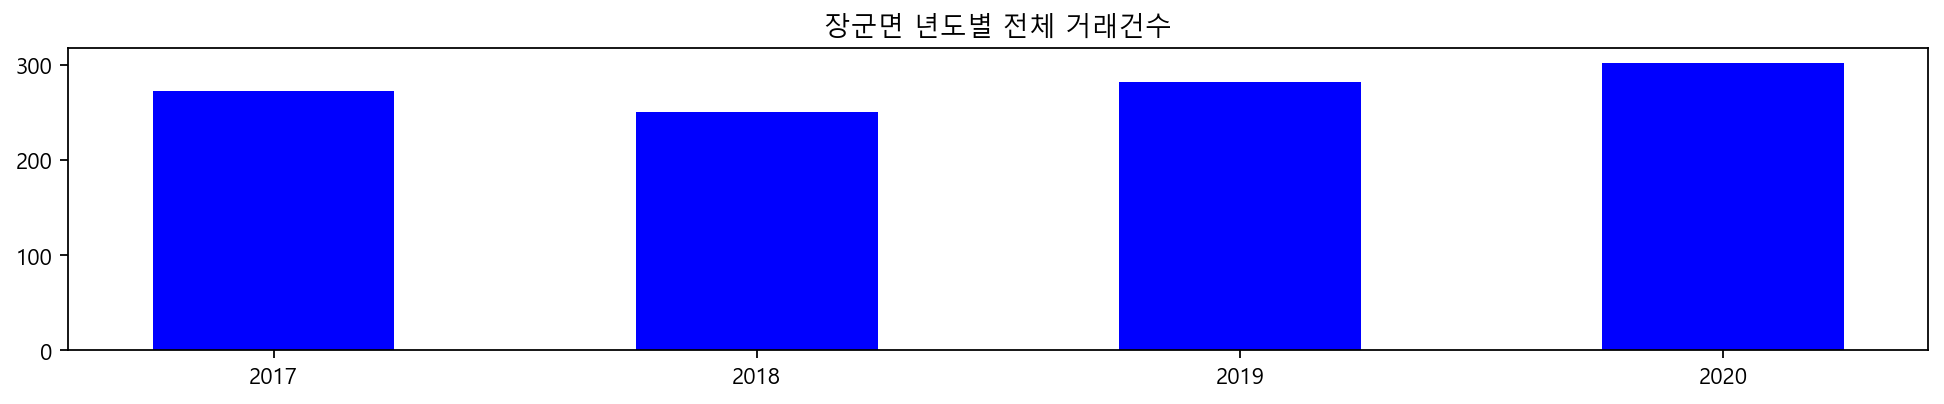

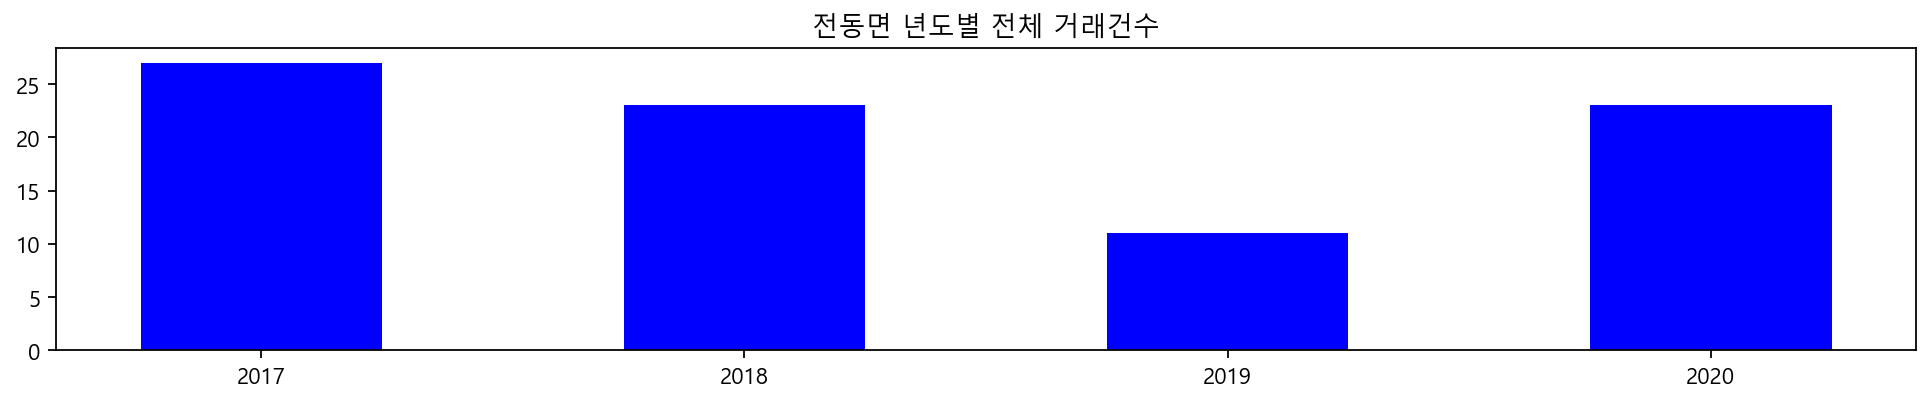

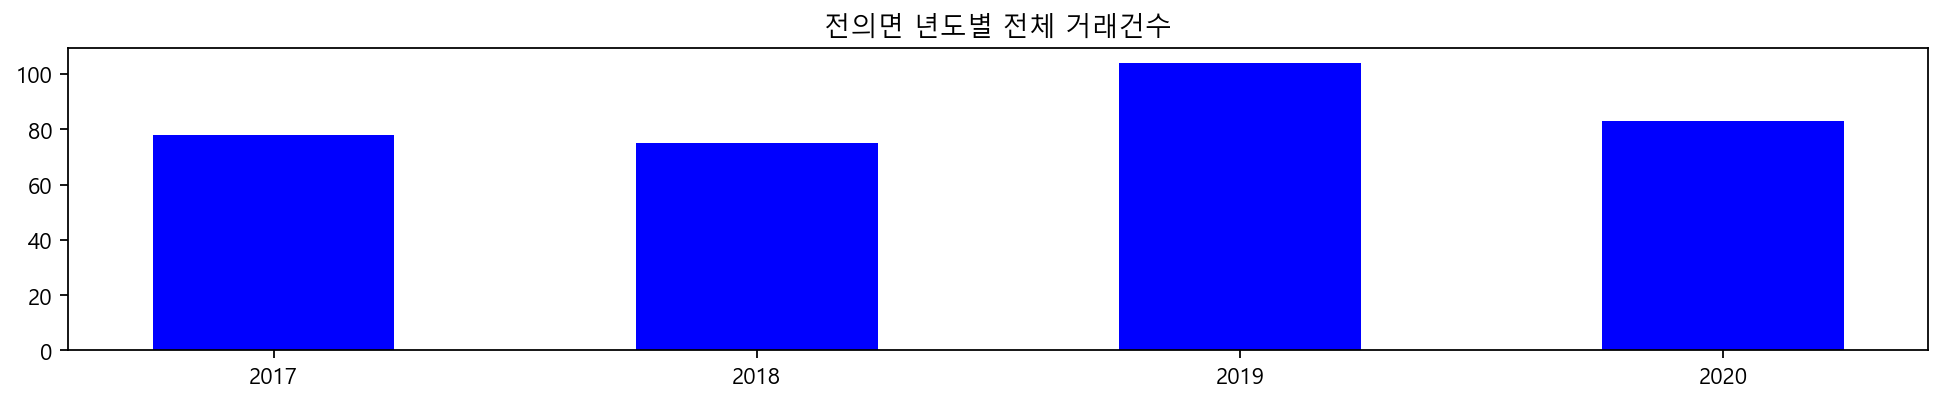

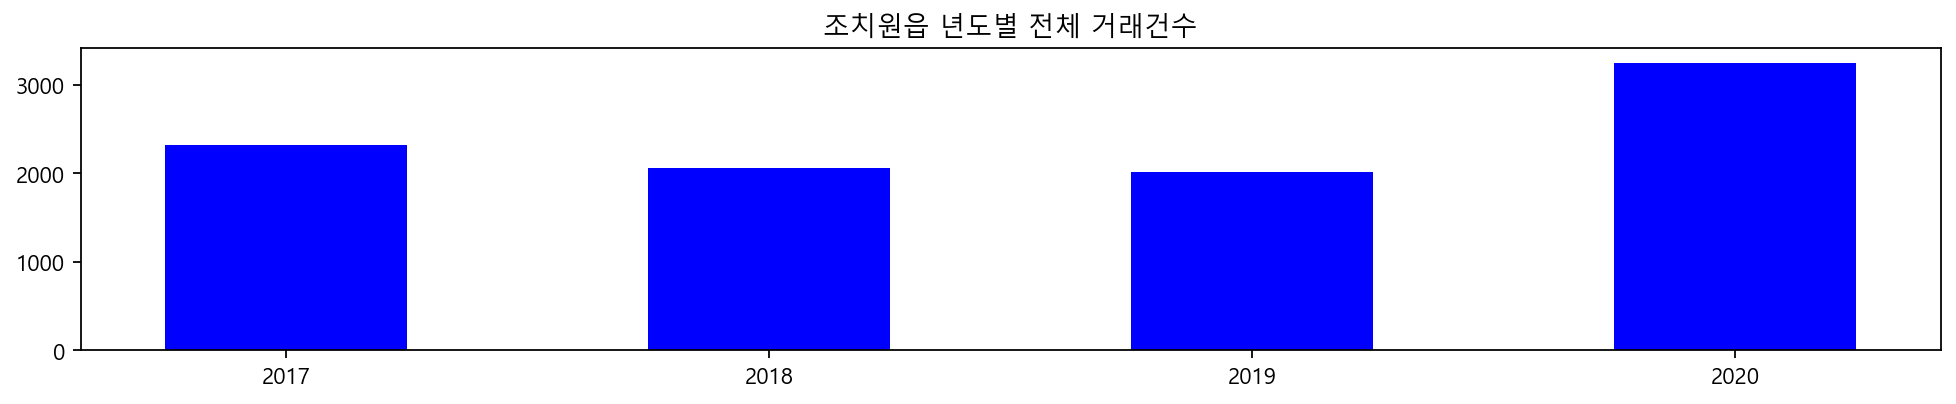

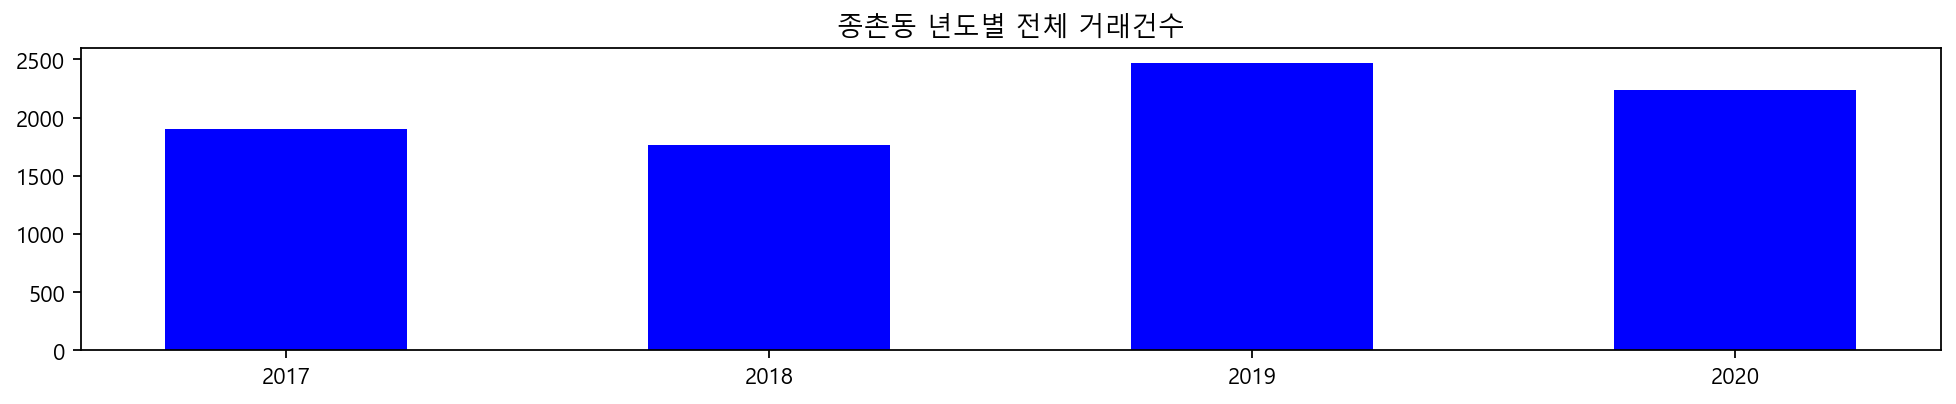

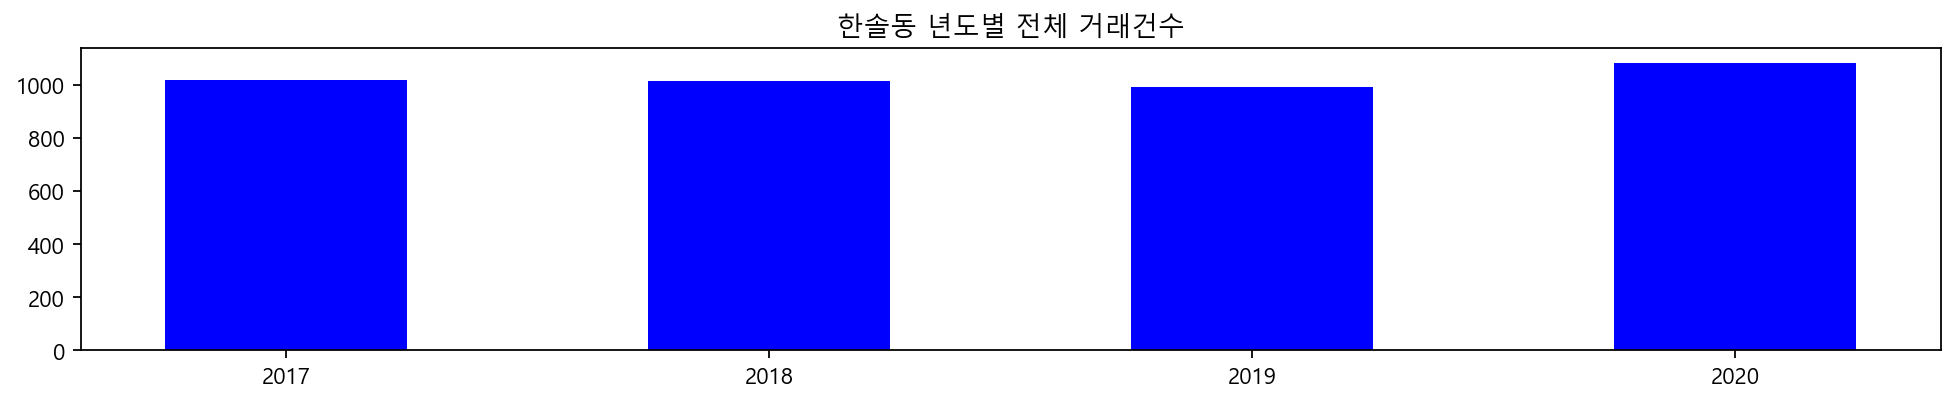

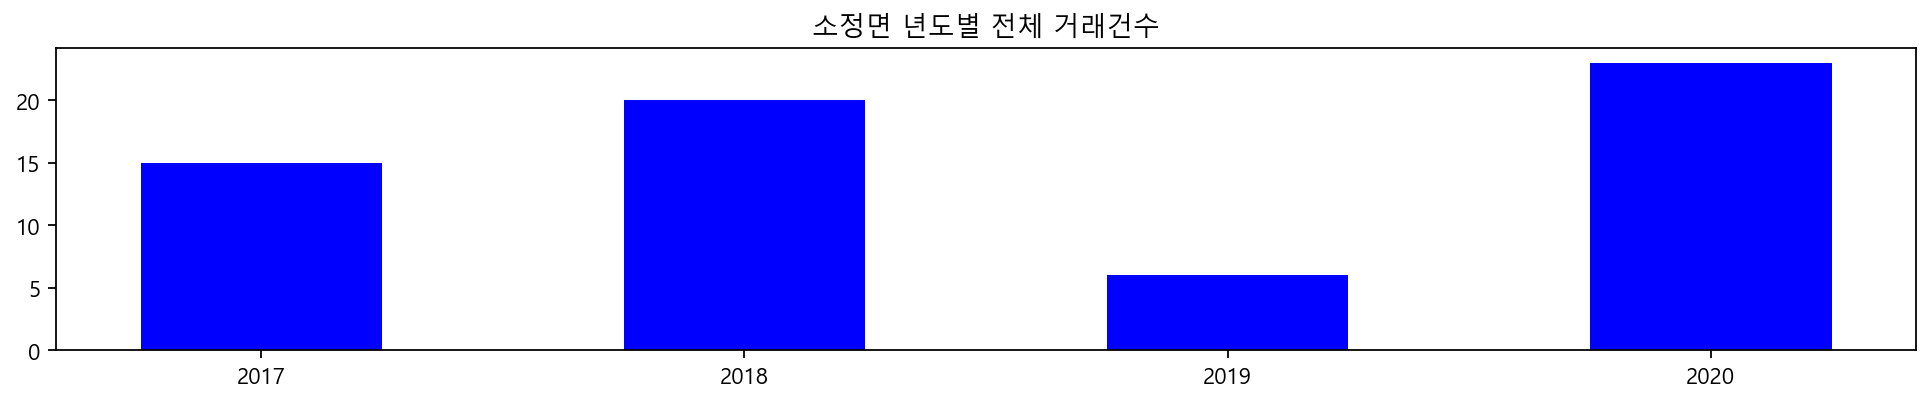

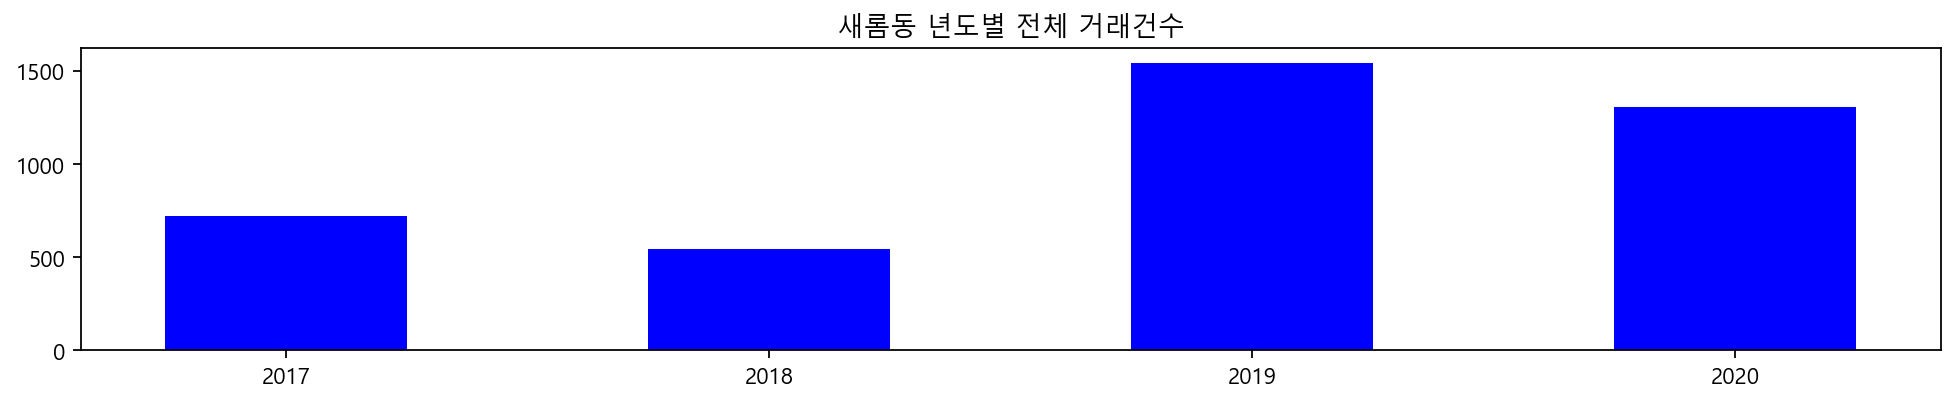

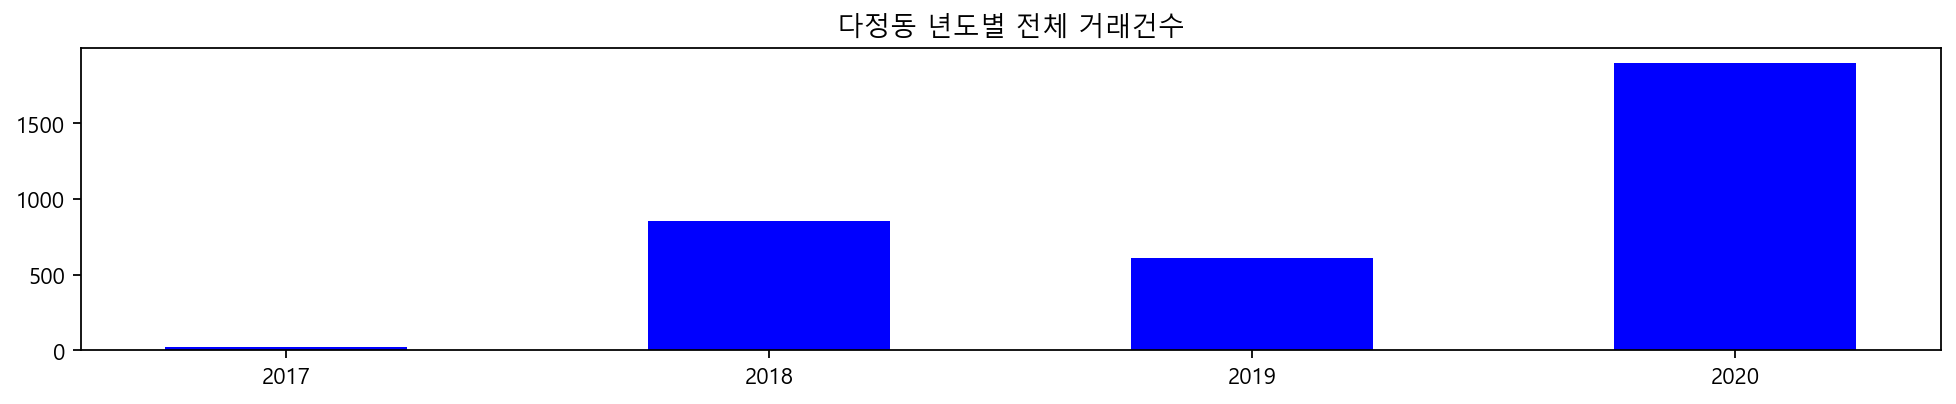

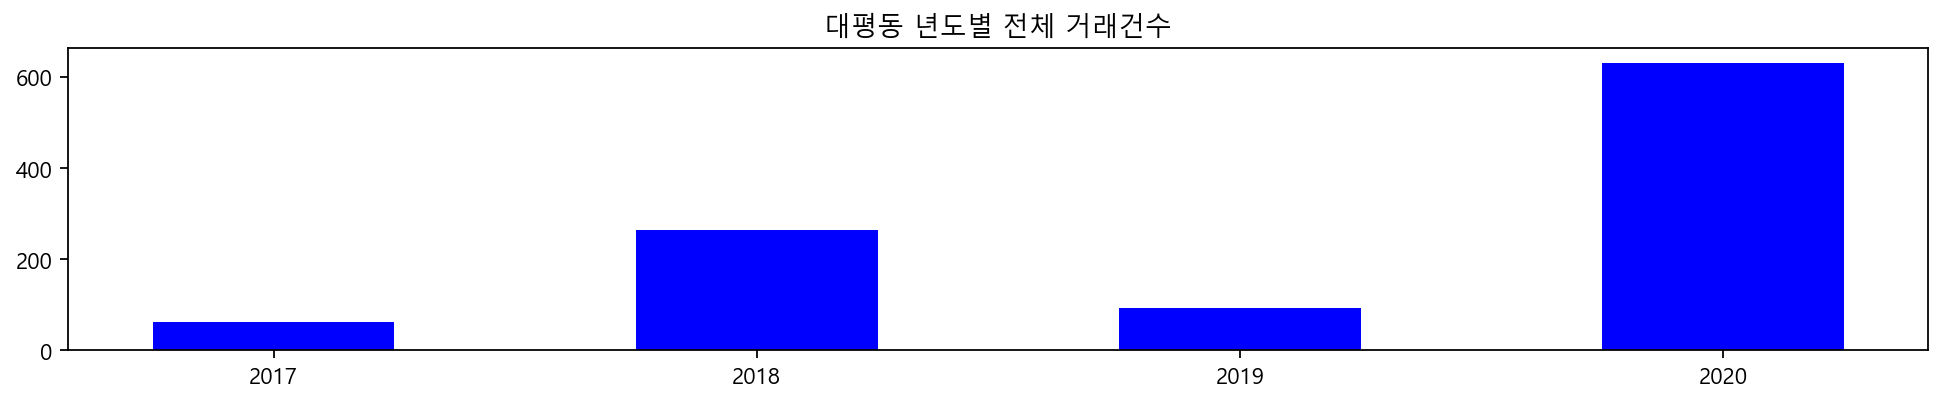

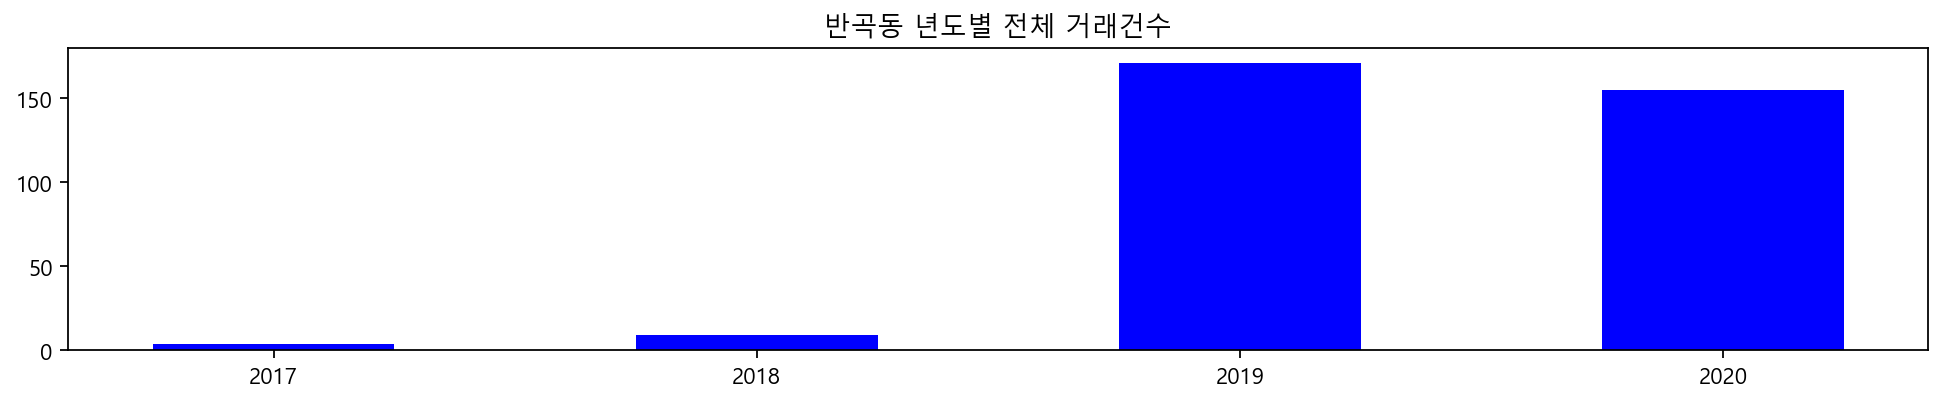

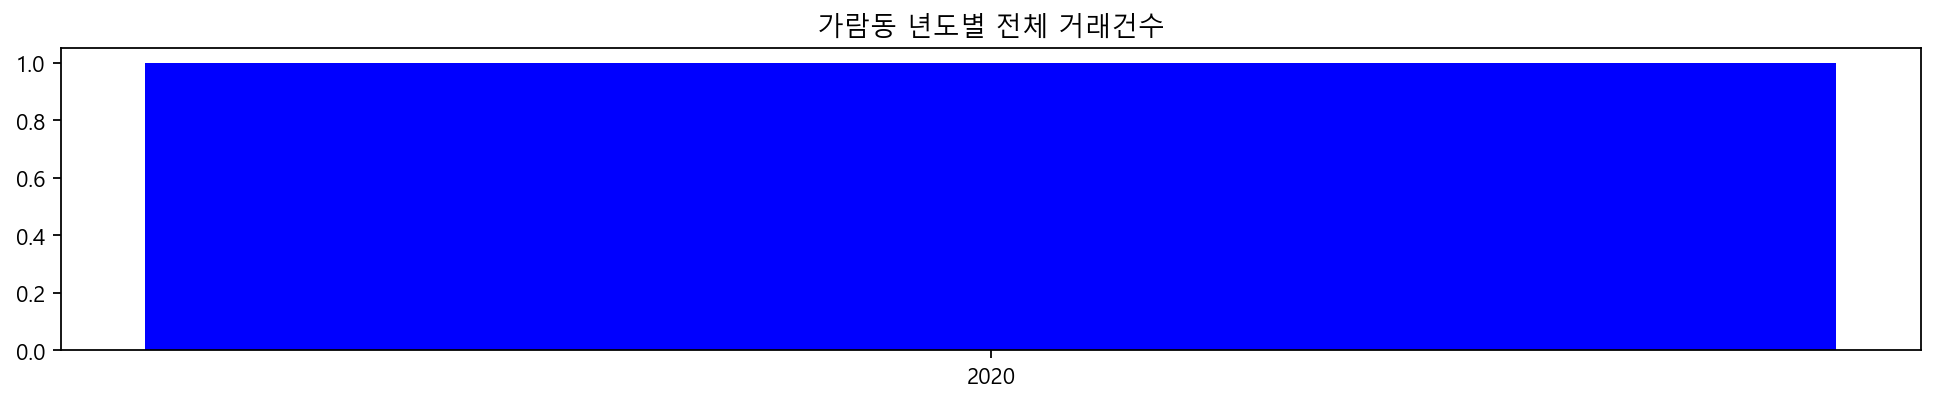

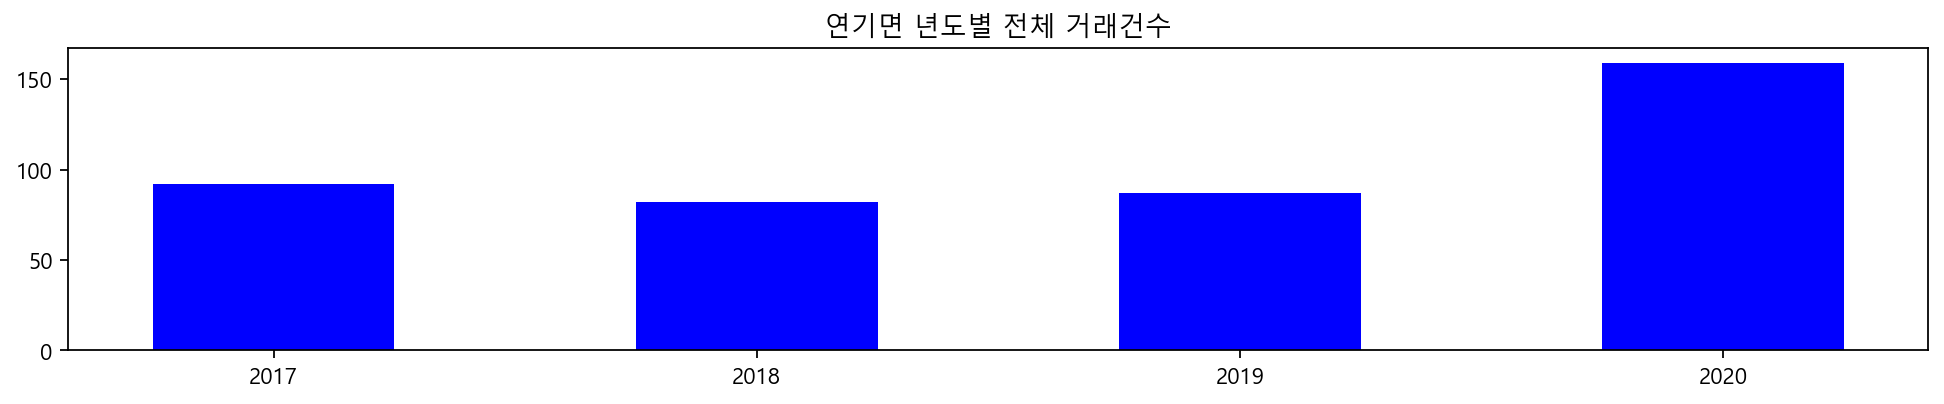

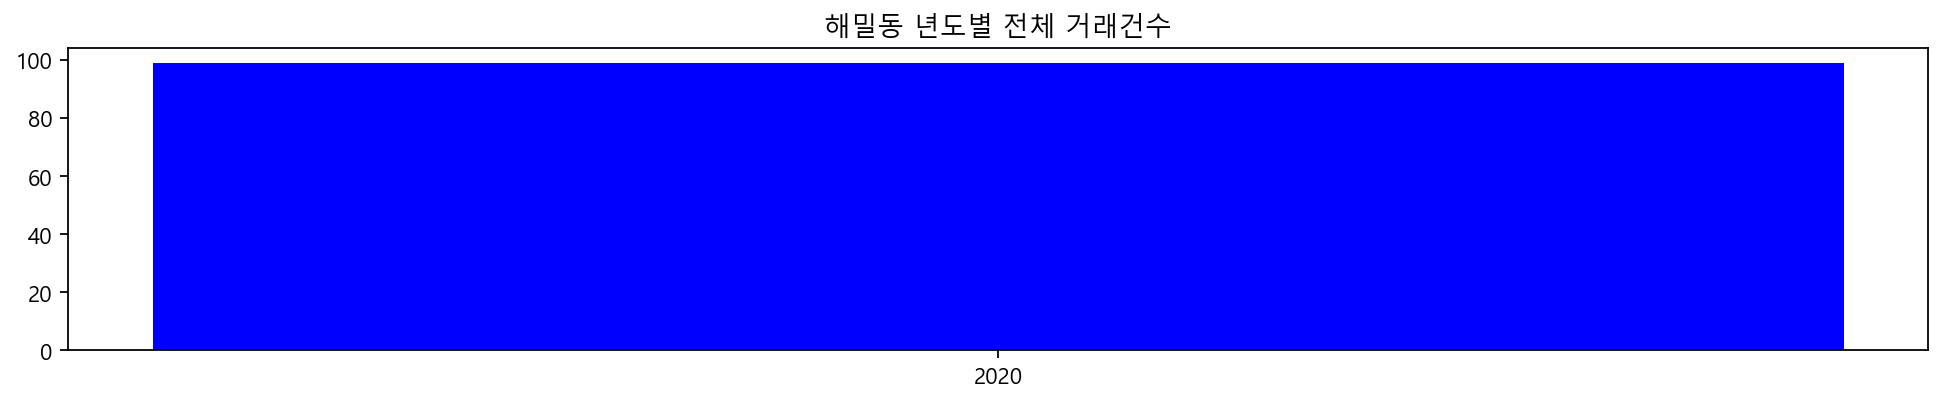

In [19]:
def year(df):
    return df[:-2]
data_all['계약년월']=data_all['계약년월'].astype(str)
data_all['계약년']=data_all['계약년월'].apply(year)
dong_all=data_all['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data_all[data_all['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).count()
    #group_new=group_new.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+' 년도별 전체 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [20]:
dong_all=data_all['읍면동'].unique()
dong_all=list(dong_all)
dong_all

['고운동',
 '금남면',
 '나성동',
 '도담동',
 '보람동',
 '부강면',
 '소담동',
 '아름동',
 '어진동',
 '연동면',
 '연서면',
 '장군면',
 '전동면',
 '전의면',
 '조치원읍',
 '종촌동',
 '한솔동',
 '소정면',
 '새롬동',
 '다정동',
 '대평동',
 '반곡동',
 '가람동',
 '연기면',
 '해밀동']